# AI Methods for Business Final Project

**Course**: AI for Business Project



 **Program**: MSc Digital Driven Business – AUAS



 **Students**: Bustos Virginia , Roy Sreejoni, Ariana Ferrara, Reusch Benita



 **Date of submission**: 09/01/2026

## Introduction
Strategic decisions in the film industrys, such as release timing and budget allocation, are made under significant uncertainty and can strongly influence box-office performance. Recent advances in artificial intelligence enable firms to complement traditional decision-making approaches with data-driven predictive models.

This project applies machine learning techniques to forecast box-office revenue and support release-window decisions by combining structured film attributes with qualitative signals extracted from pre-release expert reviews using transformer-based embeddings. The study focuses on methodological rigor, reproducibility, and the translation of advanced AI methods into actionable business insights.


## Notebook Structure

Data Preparation and Feature Construction
- Data Sources and Scope
- Data Cleaning and Pre-processing
- Exploratory Data Analysis (EDA)
- Feature Engineering
- Text Representation Using Transformer Embeddings
- Dataset Splitting Strategy
- Handling Missing Values (Imputation)
- Feature Scaling
- Feature Selection via Matrix Decomposition (PCA)
- Data Preparation Summary

Modeling & Analysis
- Modeling Strategy Overview
- Baseline Model
- Random Forest Model
- Neural Network with Transformer-Based Features
- Model Evaluation & Comparison

Results & Business Implications
- From Business Questions to Data-Driven Insights
- Discussion 
- Limitations 
- Conclusion 
- References 
- Appendix 
- GenAI Declaration

**Data Preparation and Modeling Pipeline**

This diagram shows the end-to-end data preparation pipeline, highlighting how raw data is transformed into different feature representations used by different machine learning models. 

Saved as data_preparation_pipeline_academic_v3.svg


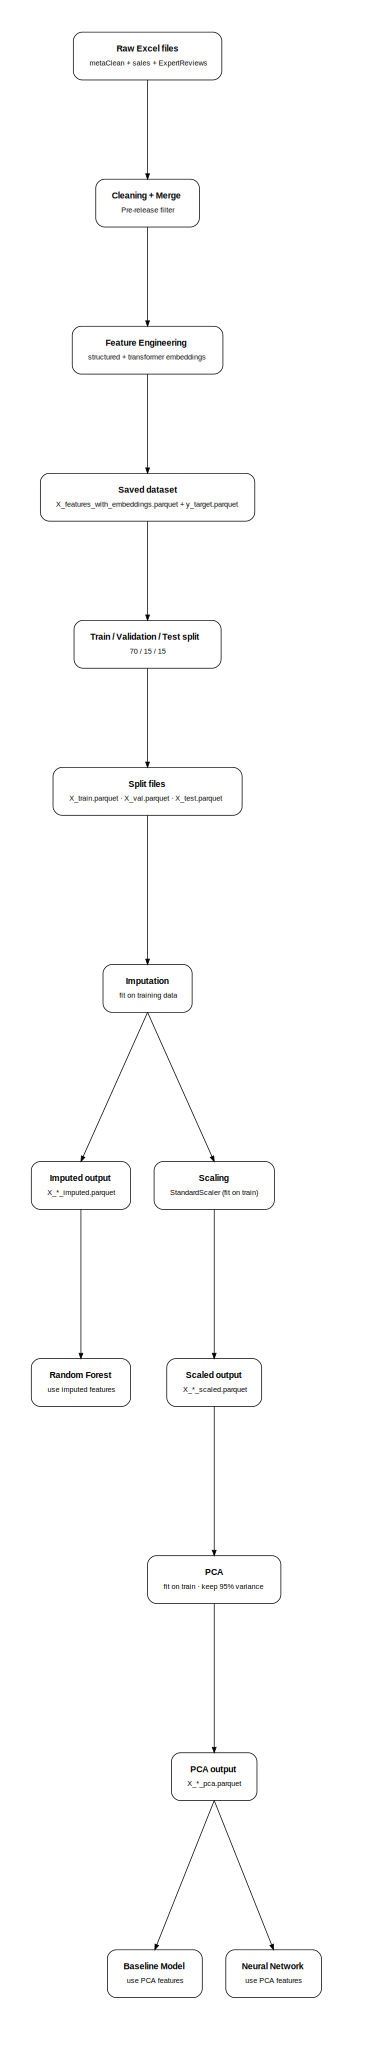

In [1]:
# Virginia Bustos
from graphviz import Digraph

# Create diagram as SVG (best quality, no pixelation)
dot = Digraph("data_pipeline", format="svg", engine="dot")

# Global graph styling
dot.attr(
    "graph",
    rankdir="TB",          # top-to-bottom
    fontname="Arial",
    fontsize="12",
    nodesep="0.45",        # horizontal spacing between nodes
    ranksep="0.95",        # vertical spacing (prevents arrow/text overlap)
    pad="0.60",            # padding around whole diagram (prevents bottom clipping)
    margin="0.35",         # extra margin (prevents clipping)
    splines="polyline"     # cleaner than ortho for text-heavy diagrams
)

dot.attr(
    "node",
    shape="box",
    style="rounded",
    fontname="Arial",
    fontsize="12",
    margin="0.25,0.18"     #internal padding inside nodes (keeps text away from edges)
)

dot.attr(
    "edge",
    fontname="Arial",
    fontsize="10",
    arrowsize="0.75"
)

# Helper: centered HTML label
def add_node(node_id, title, subtitle=None):
    if subtitle:
        label = f"""<
        <TABLE BORDER="0" CELLBORDER="0" CELLPADDING="2">
          <TR><TD ALIGN="CENTER"><B>{title}</B></TD></TR>
          <TR><TD ALIGN="CENTER"><FONT POINT-SIZE="10">{subtitle}</FONT></TD></TR>
        </TABLE>
        >"""
    else:
        label = f"""<
        <TABLE BORDER="0" CELLBORDER="0" CELLPADDING="2">
          <TR><TD ALIGN="CENTER"><B>{title}</B></TD></TR>
        </TABLE>
        >"""
    dot.node(node_id, label=label)

# Nodes 
add_node("A", "Raw Excel files", "metaClean + sales + ExpertReviews")
add_node("B", "Cleaning + Merge", "Pre-release filter")
add_node("C", "Feature Engineering", "structured + transformer embeddings")
add_node("D", "Saved dataset", "X_features_with_embeddings.parquet + y_target.parquet")
add_node("E", "Train / Validation / Test split", "70 / 15 / 15")
add_node("F", "Split files", "X_train.parquet · X_val.parquet · X_test.parquet")

add_node("G", "Imputation", "fit on training data")

add_node("H", "Imputed output", "X_*_imputed.parquet")
add_node("RF", "Random Forest", "use imputed features")

add_node("I", "Scaling", "StandardScaler (fit on train)")
add_node("J", "Scaled output", "X_*_scaled.parquet")
add_node("K", "PCA", "fit on train · keep 95% variance")
add_node("L", "PCA output", "X_*_pca.parquet")

add_node("BL", "Baseline Model", "use PCA features")
add_node("NN", "Neural Network", "use PCA features")

# Edges

def connect(u, v, minlen="2"):
    dot.edge(u, v, tailport="s", headport="n", minlen=minlen)

connect("A", "B")
connect("B", "C")
connect("C", "D")
connect("D", "E")
connect("E", "F")
connect("F", "G", minlen="3")  # extra space before branching

# Branch 1: Imputation -> RF
connect("G", "H", minlen="3")
connect("H", "RF", minlen="3")

# Branch 2: Scaling -> PCA -> Models
connect("G", "I", minlen="3")
connect("I", "J", minlen="3")
connect("J", "K", minlen="3")
connect("K", "L", minlen="3")
connect("L", "BL", minlen="3")
connect("L", "NN", minlen="3")

#keep BL and NN on the same horizontal level for alignment
with dot.subgraph() as s:
    s.attr(rank="same")
    s.node("BL")
    s.node("NN")

# Render
dot.render("data_preparation_pipeline_academic_v3", cleanup=True)
print("Saved as data_preparation_pipeline_academic_v3.svg")

from IPython.display import SVG, display
display(SVG(filename="data_preparation_pipeline_academic_v3.svg"))


## Purpose & Objective 

The purpose of this project is to apply machine learning methods to support strategic decision-making in the film industry by forecasting box-office revenue and informing release-timing choices. The objective is to develop a rigorous and reproducible modeling pipeline that combines structured film attributes with transformer-based representations of pre-release expert reviews, and to evaluate how these integrated features contribute to predictive performance and business-relevant insights.


## Business Questions

**Main business question**: How can studios use a machine learning model that combines structured film attributes (genre and budget) with transformer-based insights from pre-release expert reviews to recommend the optimal release timing for a film and accurately forecast the box-office revenue expected for that recommended window?


- **Sub-question 1**: How do structured film attributes such as genre and budget correlate with box-office performance, and which of these factors have the strongest historical influence on revenue outcomes?

- **Sub-question 2**: To what extent do transformer-based text embeddings from pre-release expert reviews improve predictive accuracy compared to models using only structured film attributes?

- **Sub-question 3**: How does release timing affect revenue performance across different genre and budget combinations, and can machine learning identify patterns that indicate optimal release windows?

- **Sub-question 4**: 
Can the final machine learning model reliably recommend the optimal release window and forecast expected box-office revenue for that timing based on a film’s genre, budget, and pre-release expert review text?


## Data Description

The dataset integrates structured film attributes with pre-release expert review data to support predictive modeling in a business context. Structured variables capture financial, categorical, and temporal characteristics of each film, while expert review texts are transformed into numerical representations using transformer-based embeddings. All variables are restricted to information available prior to release, ensuring that the dataset reflects realistic decision, that make conditions and provides a consistent basis for exploratory analysis and model development.


## EDA based in Business Questions

In [2]:
# Benita
import numpy as np
import pandas as pd
from plotnine import *  # Import everything for visualization
import os
import scipy
import warnings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  # Print all outputs
from IPython.core.display import HTML  # Pretty print DataFrames
import seaborn as sns  # For correlation heatmap
import matplotlib.pyplot as plt  # For displaying heatmap
import re  # Added import for regular expressions
import pickle #for caching

In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Get current working directory
os.getcwd()

'c:\\Users\\benit\\Documents\\ai4business'

In [5]:
# ============================================================
# CONFIGURATION
# ============================================================
CACHE_FOLDER = r"C:\Users\benit\Documents\ai4business"
USE_CACHE = True

FILE_PATHS = {
    "sales_df": r"sales.xlsx",
    "meta_df": r"metaClean43Brightspace.xlsx",
    "expert_df": r"ExpertReviewsClean43LIWC (1).xlsx"
}

# ============================================================
# CACHE MANAGEMENT FUNCTIONS
# ============================================================
def create_cache_folder():
    """Create cache folder if it doesn't exist on the file system"""
    if not os.path.exists(CACHE_FOLDER):
        os.makedirs(CACHE_FOLDER)
        print(f"Created cache folder: {CACHE_FOLDER}")

def get_cache_path(filename):
    """Generate full file path for cached pickle file"""
    return os.path.join(CACHE_FOLDER, f"{filename}.pkl")

def save_to_cache(data, filename):
    """Save dataframe or data object to cache file using pickle serialization"""
    try:
        create_cache_folder()
        cache_path = get_cache_path(filename)
        with open(cache_path, 'wb') as f:
            pickle.dump(data, f)
        print(f"  ✓ Cached {filename}")
    except Exception as e:
        print(f"  ⚠ Could not cache {filename}: {e}")

def load_from_cache(filename):
    """Load dataframe or data object from cache file if it exists"""
    try:
        cache_path = get_cache_path(filename)
        if os.path.exists(cache_path):
            with open(cache_path, 'rb') as f:
                data = pickle.load(f)
            print(f"  ✓ Loaded {filename} from cache")
            return data
        else:
            return None
    except Exception as e:
        print(f"  ⚠ Could not load {filename} from cache: {e}")
        return None


In [6]:
# ============================================================
# DATA LOADING
# ============================================================
def load_single_dataset(dataset_name, file_path):
    """Load a single dataset from cache or Excel file"""
    print(f"\nLoading {dataset_name}...")
    if USE_CACHE:
        cached_data = load_from_cache(dataset_name)
        if cached_data is not None:
            return cached_data

    try:
        print(f"  Loading from Excel: {file_path}")
        data = pd.read_excel(file_path)
        if USE_CACHE:
            save_to_cache(data, dataset_name)
        print(f"  Loaded {dataset_name} from Excel ({len(data)} rows)")
        return data
    except FileNotFoundError as e:
        print(f"  Error loading {dataset_name}: {e}")
        print("  Please check file path")
        raise

def load_all_datasets():
    """Load sales_df , meta_df , and Expert_df datasets"""
    print("Loading datasets...")
    datasets = {}
    for dataset_name, file_path in FILE_PATHS.items():
        datasets[dataset_name] = load_single_dataset(dataset_name, file_path)

    print("\nAll files loaded successfully!")
    for name, df in datasets.items():
        print(f"\n{name} columns:")
        print(df.columns.tolist())
        print(f"Shape: {df.shape}")
    return datasets

# ============================================================
# TITLE / NAME CLEANING HELPER
# ============================================================
def clean_movie_name(text):
    """
    Aggressive cleaning for generating stable keys / IDs.
    - Lowercase
    - Strip URL path / punctuation
    - Remove brackets & years
    - Collapse spaces
    """
    if pd.isna(text) or text is None:
        return ""
    name = str(text).lower().strip().rstrip("/")

    # If it's a URL, just use the last segment after '/'
    name = name.rsplit("/", 1)[-1]

    # Replace dashes/underscores with spaces
    name = name.replace("-", " ").replace("_", " ")

    # Remove bracketed content () or []
    name = re.sub(r"\([^)]*\)|\[[^\]]*\]", "", name)

    # Remove non-alphanumeric (keep spaces)
    name = re.sub(r"[^a-z0-9 ]", "", name)

    # Remove trailing years like "1999" or "2016"
    name = re.sub(r"[\(\[]\s*(?:19|20)\d{2}[^)\]]*\s*[\)\]]\s*$|(?:19|20)\d{2}\s*$", "", name)

    # Collapse multiple spaces
    name = re.sub(r"\s+", " ", name).strip()

    return name

# ============================================================
# CREATE cleaned_title FOR EACH DATASET
# ============================================================
def create_cleaned_title_for_sales(sales_df):
    """
    Ensure sales_df has a 'cleaned_title' column based on the best available source:
    - Prefer 'cleaned_title' if it already exists
    - Else prefer 'url'
    - Else fall back to 'Title'/'title'
    - Else mark as empty
    """
    if "cleaned_title" in sales_df.columns:
        print("sales_df: 'cleaned_title' already exists, reusing.")
        return

    if "url" in sales_df.columns:
        source_col = "url"
        print("sales_df: creating 'cleaned_title' from 'url'")
    elif "Title" in sales_df.columns:
        source_col = "Title"
        print("sales_df: creating 'cleaned_title' from 'Title'")
    elif "title" in sales_df.columns:
        source_col = "title"
        print("sales_df: creating 'cleaned_title' from 'title'")
    else:
        print("sales_df: no suitable title-like column found, setting empty cleaned_title")
        sales_df["cleaned_title"] = ""
        return

    sales_df["cleaned_title"] = sales_df[source_col].apply(clean_movie_name)

def create_cleaned_title_for_meta(meta_df):
    """
    Ensure meta_file_clean has a 'cleaned_title' column based on the best available source:
    - Prefer 'cleaned_title' if it already exists
    - Else prefer 'Title'/'title'
    - Else fall back to 'url'
    - Else mark as empty
    """
    if "cleaned_title" in meta_df.columns:
        print("meta_file_clean: 'cleaned_title' already exists, reusing.")
        return

    if "Title" in meta_df.columns:
        source_col = "Title"
        print("meta_df: creating 'cleaned_title' from 'Title'")
    elif "title" in meta_df.columns:
        source_col = "title"
        print("meta_df: creating 'cleaned_title' from 'title'")
    elif "url" in meta_df.columns:
        source_col = "url"
        print("meta_df: creating 'cleaned_title' from 'url'")
    else:
        print("meta_df: no suitable title-like column found, setting empty cleaned_title")
        meta_df["cleaned_title"] = ""
        return

    meta_df["cleaned_title"] = meta_df[source_col].apply(clean_movie_name)


def create_cleaned_title_for_expert(expert_df):
    """
    Ensure expert_df has a 'cleaned_title' column based on the best available source:
    - Prefer 'cleaned_title' if it already exists
    - Else prefer 'Title'/'title'
    - Else fall back to 'url'
    - Else mark as empty
    """
    if "cleaned_title" in expert_df.columns:
        print("expert_df: 'cleaned_title' already exists, reusing.")
        return

    if "Title" in expert_df.columns:
        source_col = "Title"
        print("expert_df: creating 'cleaned_title' from 'Title'")
    elif "title" in expert_df.columns:
        source_col = "title"
        print("expert_df: creating 'cleaned_title' from 'title'")
    elif "url" in expert_df.columns:
        source_col = "url"
        print("expert_df: creating 'cleaned_title' from 'url'")
    else:
        print("expert_df: no suitable title-like column found, setting empty cleaned_title")
        expert_df["cleaned_title"] = ""
        return

    expert_df["cleaned_title"] = expert_df[source_col].apply(clean_movie_name)

# ============================================================
# MOVIE ID GENERATION BASED ON cleaned_title
# ============================================================
def create_movie_ids(datasets_dict):
    """
    Create stable movie_id values based ONLY on a single standardized 'cleaned_title'
    shared between meta_file_clean and sales_df.

    - cleaned_title is the canonical movie name (lowercase, stripped)
    - movie_id is generated from unique cleaned_title across both datasets
    - Any raw 'Title' / 'title' columns are left alone here but can be dropped later
    """
    sales_df = datasets_dict["sales_df"]
    meta_df = datasets_dict["meta_df"]
    expert_df = datasets_dict["expert_df"]

    # Build cleaned_title in both datasets
    create_cleaned_title_for_sales(sales_df)
    create_cleaned_title_for_meta(meta_df)
    create_cleaned_title_for_expert(expert_df)

    # Collect all cleaned titles from both
    all_cleaned = pd.concat([
        sales_df["cleaned_title"].dropna(),
        meta_df["cleaned_title"].dropna(),
        expert_df["cleaned_title"].dropna()
    ]).unique()

    # Filter out empty strings
    all_cleaned = [t for t in all_cleaned if isinstance(t, str) and t.strip() != ""]

    # Create movie_key dimension: movie_id ↔ cleaned_title
    movie_key = pd.DataFrame([
        {
            "movie_id": idx + 1,
            "cleaned_title": cleaned
        }
        for idx, cleaned in enumerate(sorted(all_cleaned))
    ])

    print(f"\nCreated movie_key with {len(movie_key)} unique movies")

    # Map cleaned_title -> movie_id
    name_to_id = dict(zip(movie_key["cleaned_title"], movie_key["movie_id"]))

    # Attach movie_id back to dataframes
    sales_df["movie_id"] = sales_df["cleaned_title"].map(name_to_id).astype("Int64")
    meta_df["movie_id"] = meta_df["cleaned_title"].map(name_to_id).astype("Int64")
    expert_df["movie_id"] = expert_df["cleaned_title"].map(name_to_id).astype("Int64")

    # drop any raw Title columns
    for df_name, df in [("sales_df", sales_df), ("meta_file_clean", meta_df), ("expert_df", expert_df)]:
        raw_title_cols = [c for c in df.columns if c.lower() == "title"]
        if raw_title_cols:
            df.drop(columns=raw_title_cols, inplace=True)
            print(f"{df_name}: dropped raw title columns {raw_title_cols}")

    return movie_key, sales_df, meta_df, expert_df

# ============================================================
# MERGE META + SALES ON movie_id (KEEP ONLY cleaned_title)
# ============================================================
def merge_datasets(meta_df, sales_df, expert_df):
    # 1. Merge meta and sales first
    meta_sales = meta_df.merge(
        sales_df,
        on="movie_id",
        how="inner",
        suffixes=("_meta", "_sales")
    )

    # 2. Merge the result with the expert dataset
    merged = meta_sales.merge(
        expert_df,
        on="movie_id",
        how="inner",
        # Use a suffix for the new expert columns if there are name collisions
        suffixes=("", "_expert") 
    )
    print(f"\nMerged datasets on movie_id: {merged.shape[0]} rows")

    # unify cleaned_title
    if "cleaned_title_meta" in merged.columns and "cleaned_title_sales" in merged.columns:
        merged["cleaned_title"] = merged["cleaned_title_meta"]
        merged.drop(columns=["cleaned_title_meta", "cleaned_title_sales"], inplace=True)
        print("Merged: unified 'cleaned_title' column.")

    # Drop rows where movie_id was not assigned
    before = merged.shape[0]
    merged = merged[merged["movie_id"].notna()].copy()
    after = merged.shape[0]
    print(f"Dropped {before - after} rows due to missing movie_id")

    return merged


# ============================================================
# Run Above Funcitons
# ============================================================
if __name__ == "__main__":
    # 1) Load datasets
    datasets = load_all_datasets()
    sales_df = datasets["sales_df"]
    meta_df = datasets["meta_df"]
    expert_df = datasets["expert_df"]

    # 2) Create standardized cleaned_title + movie_id
    movie_key, sales_df, meta_df, expert_df = create_movie_ids(datasets)

    # 3) Merge on movie_id with a single cleaned_title column
    merged_df = merge_datasets(meta_df, sales_df, expert_df)

    # 4) Quick sanity checks
    print("\n=== merged_df HEAD (movie_id, cleaned_title) ===")
    print(merged_df[["movie_id", "cleaned_title"]].head())

    print("\n=== movie_key HEAD ===")
    print(movie_key.head())


Loading datasets...

Loading sales_df...
  ✓ Loaded sales_df from cache

Loading meta_df...
  ✓ Loaded meta_df from cache

Loading expert_df...
  ✓ Loaded expert_df from cache

All files loaded successfully!

sales_df columns:
['year', 'release_date', 'title', 'genre', 'international_box_office', 'domestic_box_office', 'worldwide_box_office', 'production_budget', 'Unnamed: 8', 'opening_weekend', 'theatre_count', 'avg run per theatre', 'runtime', 'keywords', 'creative_type', 'url']
Shape: (30612, 16)

meta_df columns:
['url', 'title', 'studio', 'rating', 'runtime', 'cast', 'director', 'genre', 'summary', 'awards', 'metascore', 'userscore', 'RelDate']
Shape: (11364, 13)

expert_df columns:
['url', 'idvscore', 'reviewer', 'dateP', 'Rev']
Shape: (238973, 5)
sales_df: creating 'cleaned_title' from 'url'
meta_df: creating 'cleaned_title' from 'title'
expert_df: creating 'cleaned_title' from 'url'

Created movie_key with 34395 unique movies
sales_df: dropped raw title columns ['title']
meta_f

In [ ]:
# Benita
# Display shapes and heads to verify loading
sales_df.shape
sales_df.head()
meta_df.shape
meta_df.head()
expert_df.shape
expert_df.head()

# Data types and info
sales_df.info()
meta_df.info()
expert_df.info()

# Check for missing values
sales_missing = sales_df.isnull().sum()
sales_missing[sales_missing > 0]
meta_missing = meta_df.isnull().sum()
meta_missing[meta_missing > 0]
expert_missing = expert_df.isnull().sum()
expert_missing[expert_missing > 0]

(30612, 17)

,year,release_date,genre,international_box_office,domestic_box_office,worldwide_box_office,production_budget,Unnamed: 8,opening_weekend,theatre_count,avg run per theatre,runtime,keywords,creative_type,url,cleaned_title,movie_id
0,2000,January 1st,Drama,76576.0,NaN,76576.0,NaN,NaN,NaN,NaN,NaN,129.0,NaN,Contemporary Fiction,https://www.the-numbers.com/movie/Bakha-Satang...,bakha satang,2948
1,2001,January 12th,Thriller/Suspense,6900000.0,10965209.0,17865209.0,30000000.0,NaN,5486209.0,2433.0,3.1,NaN,NaN,Contemporary Fiction,https://www.the-numbers.com/movie/Antitrust,antitrust,2067
2,2000,January 28th,NaN,NaN,378562.0,NaN,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,https://www.the-numbers.com/movie/Santitos,santitos,25194
3,2002,2002 (Wide) by,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.the-numbers.com/movie/Frank-McKlus...,frank mcklusky c i,10464
4,2002,January 25th,Drama,4833792.0,41227069.0,46060861.0,11000000.0,NaN,12177488.0,2411.0,5.3,NaN,Coming of Age,Contemporary Fiction,https://www.the-numbers.com/movie/Walk-to-Reme...,walk to remember a,32608


(11364, 14)

,url,studio,rating,runtime,cast,director,genre,summary,awards,metascore,userscore,RelDate,cleaned_title,movie_id
0,https://www.metacritic.com/movie/!women-art-re...,Hotwire Productions,| Not Rated,83.0,NaN,Lynn Hershman-Leeson,Documentary,NaN,NaN,70,NaN,2011-06-01,women art revolution,33445
1,https://www.metacritic.com/movie/10-cloverfiel...,Paramount Pictures,| PG-13,104.0,"John Gallagher Jr.,John Goodman,Mary Elizabeth...",Dan Trachtenberg,"Action,Sci-Fi,Drama,Mystery,Thriller,Horror","Waking up from a car accident, a young woman (...","#18MostDiscussedMovieof2016 , #1MostSharedMovi...",76,7.7,2016-03-11,10 cloverfield lane,10
2,https://www.metacritic.com/movie/10-items-or-less,Click Star,| R,82.0,"Jonah Hill,Morgan Freeman,Paz Vega",Brad Silberling,"Drama,Comedy,Romance",While researching a role as a supermarket mana...,NaN,54,5.8,2006-12-01,10 items or less,16
3,https://www.metacritic.com/movie/10-years,Anchor Bay Entertainment,| R,100.0,"Channing Tatum,Chris Pratt,Jenna Dewan",Jamie Linden,"Drama,Comedy,Romance",NaN,NaN,61,6.9,2012-09-14,10 years,25
4,https://www.metacritic.com/movie/100-bloody-acres,Music Box Films,| Not Rated,91.0,NaN,Cameron Cairnes,"Horror,Comedy",Reg and Lindsay run an organic fertilizer busi...,NaN,63,7.5,2013-06-28,100 bloody acres,29


(238973, 7)

,url,idvscore,reviewer,dateP,Rev,cleaned_title,movie_id
0,https://www.metacritic.com/movie/bronson,100.0,"""Andrew O'Hehir""",None,'Bronson owes a little or a lot to Kubrick s ...,bronson,4727
1,https://www.metacritic.com/movie/bronson,90.0,'A.O. Scott',None,'Bronson invites you to admire its protagonis...,bronson,4727
2,https://www.metacritic.com/movie/bronson,90.0,None,None,'Whether it s Peterson/Bronson s more theatri...,bronson,4727
3,https://www.metacritic.com/movie/bronson,83.0,'Noel Murray',None,'There are two Bronsons on display here: the ...,bronson,4727
4,https://www.metacritic.com/movie/bronson,80.0,'Joshua Rothkopf',None,'Refn has somehow found his way to an authent...,bronson,4727


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30612 entries, 0 to 30611
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      30612 non-null  int64  
 1   release_date              30612 non-null  object 
 2   genre                     28908 non-null  object 
 3   international_box_office  21575 non-null  float64
 4   domestic_box_office       11884 non-null  float64
 5   worldwide_box_office      21575 non-null  float64
 6   production_budget         4480 non-null   float64
 7   Unnamed: 8                0 non-null      float64
 8   opening_weekend           10929 non-null  float64
 9   theatre_count             10963 non-null  float64
 10  avg run per theatre       10952 non-null  float64
 11  runtime                   24559 non-null  float64
 12  keywords                  12517 non-null  object 
 13  creative_type             26667 non-null  object 
 14  url   

genre                        1704
international_box_office     9037
domestic_box_office         18728
worldwide_box_office         9037
production_budget           26132
Unnamed: 8                  30612
opening_weekend             19683
theatre_count               19649
avg run per theatre         19660
runtime                      6053
keywords                    18095
creative_type                3945
movie_id                       19
dtype: int64

studio        350
rating       1067
runtime       255
cast         3702
director       14
genre          20
summary      5897
awards       6977
userscore    2105
movie_id       11
dtype: int64

idvscore      2
reviewer      2
dateP         2
Rev           2
movie_id    187
dtype: int64

In [ ]:
# Benita 
# Data Quality Check: Identify movies that exist in only one dataset but failed to merge
# This helps us understand data coverage and potential matching issues across our three sources

# Movies that appear in Metacritic but not in the merged dataset
meta_only_ids = set(meta_df['movie_id'].dropna()) - set(merged_df['movie_id'])
# Movies that appear in sales data but not in the merged dataset  
sales_only_ids = set(sales_df['movie_id'].dropna()) - set(merged_df['movie_id'])
# Movies that appear in expert reviews but not in the merged dataset
expert_only_ids = set(expert_df['movie_id'].dropna()) - set(merged_df['movie_id'])

# Print summary of unmatched movies to assess data loss from merging
print("Meta-only movies:", len(meta_only_ids))
print("Sales-only movies:", len(sales_only_ids))
print("Expert-only movies:", len(expert_only_ids))


Meta-only movies: 4375
Sales-only movies: 23169
Expert-only movies: 4384


In [ ]:
# Benita
# Merge Validation: Verify the structure and uniqueness of the merged dataset
# This checks data integrity after combining the three source datasets

# Total number of rows in the merged dataset (includes duplicate reviews per movie)
print("Merged rows:", len(merged_df))
# Number of unique movies in the merged dataset (to verify movie_id assignment worked)
print("Unique movie_ids in merged:", merged_df['movie_id'].nunique())
# Number of unique movie titles to cross-check against movie_id uniqueness
print("Unique cleaned_title in merged:", merged_df['cleaned_title'].nunique())

Merged rows: 179817
Unique movie_ids in merged: 6741
Unique cleaned_title in merged: 6741


In [ ]:
# Benita
# print complete list of column names
print(merged_df.columns.tolist())

['url_meta', 'studio', 'rating', 'runtime_meta', 'cast', 'director', 'genre_meta', 'summary', 'awards', 'metascore', 'userscore', 'RelDate', 'movie_id', 'year', 'release_date', 'genre_sales', 'international_box_office', 'domestic_box_office', 'worldwide_box_office', 'production_budget', 'Unnamed: 8', 'opening_weekend', 'theatre_count', 'avg run per theatre', 'runtime_sales', 'keywords', 'creative_type', 'url_sales', 'url', 'idvscore', 'reviewer', 'dateP', 'Rev', 'cleaned_title']


In [ ]:
# Benita
# Combine genre columns from different datasets into one long string
raw_text = merged_df['genre_sales'].fillna('') + "," + merged_df['genre_meta'].fillna('')

# Clean it up: Split by comma -> Remove Duplicates (set) -> Join back
# We also verify 'if s.strip()' to make sure we don't include empty spaces
merged_df['genre'] = raw_text.apply(lambda x: ", ".join(set(s.strip() for s in x.split(',') if s.strip())))

# Drop the old columns
merged_df = merged_df.drop(columns=['genre_sales', 'genre_meta'])

In [ ]:
# Ariana?
# Ensure columns are numeric (converts errors to NaN) -> This prevents crashes if your data has "$" signs or commas (e.g. "$1,000")
cols_to_fix = ['worldwide_box_office', 'international_box_office', 'domestic_box_office']
for col in cols_to_fix:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

# Define the logic function
def calculate_total_revenue(row):
    ww = row['worldwide_box_office']
    
    # Check if worldwide exists (not NaN) AND is not 0
    if pd.notna(ww) and ww != 0:
        return ww
    
    # if worldwide doesnt exist: Sum International + Domestic
    intl = row['international_box_office'] if pd.notna(row['international_box_office']) else 0
    dom = row['domestic_box_office'] if pd.notna(row['domestic_box_office']) else 0
    
    return intl + dom

# Apply the function
merged_df['total_revenue'] = merged_df.apply(calculate_total_revenue, axis=1)


In [ ]:
# Ariana?
# drop all columns except those below
columns_to_keep = [
    "genre",
    "opening_weekend",
    "production_budget",
    "year",
    "release_date",
    "movie_id",
    "cleaned_title",
    "Rev",
    "total_revenue",
    "dateP"
]

merged_cleaned_df = merged_df[columns_to_keep]

# To verify the change:
print(merged_cleaned_df.head())

print("Columns after cleaning:")
print(merged_cleaned_df.columns)
print("Shape:", merged_cleaned_df.shape)

         genre  opening_weekend  production_budget  year release_date  \
0  Documentary           5791.0                NaN  2011     June 1st   
1  Documentary           5791.0                NaN  2011     June 1st   
2  Documentary           5791.0                NaN  2011     June 1st   
3  Documentary           5791.0                NaN  2011     June 1st   
4  Documentary           5791.0                NaN  2011     June 1st   

   movie_id         cleaned_title  \
0     33445  women art revolution   
1     33445  women art revolution   
2     33445  women art revolution   
3     33445  women art revolution   
4     33445  women art revolution   

                                                 Rev  total_revenue  \
0   'These interviews form the backbone of !W.A.R...        52681.0   
1   'In her vibrant !Women Art Revolution Hershma...        52681.0   
2   'It took 42 years for filmmaker Lynn Hershman...        52681.0   
3   'Anyone seeking a dialectic, of course, can l...  

In [ ]:
# drop expert reviews posted after release date (using "year" and "release_date" vs "dateP")
# 1. Clean the 'release_date' text to remove st/nd/rd/th
# Logic: Look for digits followed by st, nd, rd, or th and replace the suffix with nothing.
# Example: "June 1st" becomes "June 1"
merged_cleaned_df['release_date_clean'] = merged_cleaned_df['release_date'].astype(str).str.replace(r'(?<=\d)(st|nd|rd|th)', '', regex=True)

# 2. Create a combined string column (Year + Month + Day)
# Example: "2011" + " " + "June 1" = "2011 June 1"
merged_cleaned_df['full_date_str'] = merged_cleaned_df['year'].astype(str) + ' ' + merged_cleaned_df['release_date_clean']

# 3. Convert that string into a real Datetime object
merged_cleaned_df['full_release_date'] = pd.to_datetime(merged_cleaned_df['full_date_str'], errors='coerce')

# 4. Convert your Review Date (dateP) to datetime as well
merged_cleaned_df['dateP'] = pd.to_datetime(merged_cleaned_df['dateP'], errors='coerce')

# ---------------------------------------------------------
# NOW APPLY THE PRECISE FILTER
# ---------------------------------------------------------

# Keep rows where the Review Date is BEFORE or ON the specific Release Date
mask = (merged_cleaned_df['dateP'] <= merged_cleaned_df['full_release_date']) & \
       (merged_cleaned_df['dateP'].notna()) & \
       (merged_cleaned_df['full_release_date'].notna())

merged_cleaned_df = merged_cleaned_df[mask]

# Rename and clean up
merged_cleaned_df = merged_cleaned_df.rename(columns={'Rev': 'prerelease_reviews'})

# Check the results
print(f"Remaining rows: {len(merged_cleaned_df)}")
print(merged_cleaned_df[['dateP', 'full_release_date', 'prerelease_reviews']].head())

C:\Users\benit\AppData\Local\Temp\ipykernel_3840\578369594.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\benit\AppData\Local\Temp\ipykernel_3840\578369594.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\benit\AppData\Local\Temp\ipykernel_3840\578369594.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

Remaining rows: 65115
        dateP full_release_date  \
8  2011-05-31        2011-06-01   
11 2016-03-11        2016-03-11   
12 2016-03-10        2016-03-11   
13 2016-03-10        2016-03-11   
14 2016-03-10        2016-03-11   

                                   prerelease_reviews  
8    'Thankfully, Lynn Hershman-Leeson s loosely o...  
11   'Economically told from the start, the film m...  
12   'This is a terrific movie that will keep audi...  
13   'Sneakily tweaking our fears of terrorism, 10...  
14   'Approach 10 Cloverfield Lane on its own term...  


In [ ]:
# Ariana?
# List of all columns to remove
# We use errors='ignore' so it won't crash if one of these is already gone
cols_to_remove = [
    'dateP', 
    'full_release_date', 
    'year', 
    'release_date_clean',  # Intermediate helper (if it exists)
    'full_date_str'        # Intermediate helper (if it exists)
]

# Drop them
merged_cleaned_df = merged_cleaned_df.drop(columns=cols_to_remove, errors='ignore')

# Verify they are gone
print("Remaining columns:")
print(merged_cleaned_df.columns.tolist())

Remaining columns:
['genre', 'opening_weekend', 'production_budget', 'release_date', 'movie_id', 'cleaned_title', 'prerelease_reviews', 'total_revenue']


In [16]:
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

# ---------------------------------------------------
# 1. Clean and split the genre column into a list
# ---------------------------------------------------
df_genre_encoded = merged_cleaned_df.copy()

df_genre_encoded['genre_list'] = (
    df_genre_encoded['genre']
    .fillna('')                                # handle NaN
    .str.split(',')                            # split on comma
    .apply(lambda lst: 
           [g.strip().lower() for g in lst     # strip spaces + lowercase
            if g.strip() != ''])               # drop empty strings
)

# ---------------------------------------------------
# 2. Apply MultiLabelBinarizer to get one-hot columns
# ---------------------------------------------------
mlb = MultiLabelBinarizer()

genre_dummies = pd.DataFrame(
    mlb.fit_transform(df_genre_encoded['genre_list']),
    columns=[f"genre_{g}" for g in mlb.classes_],
    index=df_genre_encoded.index
)

# ---------------------------------------------------
# 3. Combine back into your dataframe
# ---------------------------------------------------
df_genre_encoded = pd.concat(
    [df_genre_encoded.drop(columns=['genre', 'genre_list']),
     genre_dummies],
    axis=1
)

# ---------------------------------------------------
# 4. (Optional) Show new shape + columns
# ---------------------------------------------------
print("New shape:", df_genre_encoded.shape)
print("Genre columns:", genre_dummies.columns.tolist())

print("---------------------------------------")
print (df_genre_encoded.columns)
print("---------------------------------------")
print (df_genre_encoded.head)

New shape: (65115, 36)
Genre columns: ['genre_action', 'genre_adult', 'genre_adventure', 'genre_animation', 'genre_biography', 'genre_black comedy', 'genre_comedy', 'genre_concert/performance', 'genre_crime', 'genre_documentary', 'genre_drama', 'genre_family', 'genre_fantasy', 'genre_history', 'genre_horror', 'genre_multiple genres', 'genre_music', 'genre_musical', 'genre_mystery', 'genre_news', 'genre_romance', 'genre_romantic comedy', 'genre_sci-fi', 'genre_short', 'genre_sport', 'genre_thriller', 'genre_thriller/suspense', 'genre_war', 'genre_western']
---------------------------------------
Index(['opening_weekend', 'production_budget', 'release_date', 'movie_id',
       'cleaned_title', 'prerelease_reviews', 'total_revenue', 'genre_action',
       'genre_adult', 'genre_adventure', 'genre_animation', 'genre_biography',
       'genre_black comedy', 'genre_comedy', 'genre_concert/performance',
       'genre_crime', 'genre_documentary', 'genre_drama', 'genre_family',
       'genre_fan

In [ ]:
# Benita
# Descriptive statistics for numerical columns
numerical_cols = ['total_revenue', 'production_budget', 'opening_weekend']
df_genre_encoded[numerical_cols].describe()

,total_revenue,production_budget,opening_weekend
count,6.511500e+04,3.547300e+04,5.260100e+04
mean,1.160901e+08,6.148203e+07,1.742844e+07
std,2.517252e+08,6.562209e+07,3.345464e+07
min,0.000000e+00,2.000000e+04,8.600000e+01
25%,1.903200e+05,1.500000e+07,5.735300e+04
50%,1.072754e+07,3.500000e+07,4.174915e+06
75%,1.030393e+08,9.000000e+07,1.954225e+07
max,2.797801e+09,4.000000e+08,3.571150e+08


In [ ]:
# Benita
# Identify the new columns in df_genre_encoded dataframe
genre_cols = [col for col in df_genre_encoded.columns if col.startswith('genre_')]

# Sum them up
genre_counts = df_genre_encoded[genre_cols].sum().sort_values(ascending=False)

# Print result
print(genre_counts)

genre_drama                  37304
genre_comedy                 20499
genre_thriller               18082
genre_action                 15099
genre_adventure              12125
genre_sci-fi                  8480
genre_crime                   8472
genre_thriller/suspense       8074
genre_romance                 7767
genre_documentary             7612
genre_fantasy                 7195
genre_horror                  7056
genre_biography               6688
genre_mystery                 5826
genre_family                  4607
genre_history                 3459
genre_animation               3088
genre_music                   2988
genre_romantic comedy         2217
genre_war                     2151
genre_musical                 1860
genre_sport                   1517
genre_black comedy            1412
genre_western                  601
genre_news                     322
genre_concert/performance      138
genre_multiple genres           67
genre_adult                     41
genre_short         

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation: Budget vs. Opening vs. Revenue')

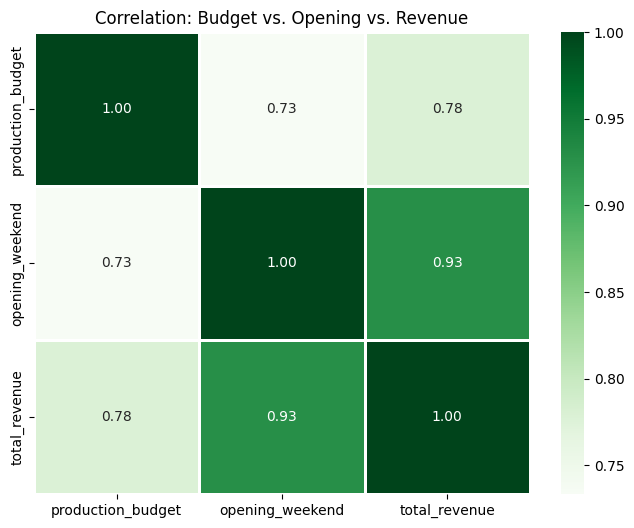

In [ ]:
# Benita
# Select only the numerical columns we have right now
# We use .drop_duplicates('movie_id') to ensure we don't count the same movie 50 times
df_unique = df_genre_encoded.drop_duplicates(subset=['movie_id'])

cols_to_check = ['production_budget', 'opening_weekend', 'total_revenue']

# Create the Correlation Matrix
corr_matrix = df_unique[cols_to_check].corr()

# Plot the Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Greens', fmt='.2f', linewidths=1)
plt.title('Correlation: Budget vs. Opening vs. Revenue')
plt.show()

This correlation analysis identifies relationships between key financial variables to understand which features might be predictive of revenue and to detect potential multicollinearity issues that could affect our models. The strong correlation between opening weekend and revenue (0.93) suggests opening weekend is a highly predictive feature, while the moderate budget-revenue correlation (0.74) indicates budget alone is insufficient for accurate predictions.

In [ ]:
# Benita
# Create a temporary DF with one row per movie_id to analyze financials/genres
# We take the first value for financials/titles, and max for genres
agg_rules = {
    'total_revenue': 'first',
    'production_budget': 'first',
    'opening_weekend': 'first',
    'cleaned_title': 'first'
}
# Add genre columns to aggregation (max)
genre_cols = [c for c in df_genre_encoded.columns if c.startswith('genre_')]
for g in genre_cols:
    agg_rules[g] = 'max'

df_unique = df_genre_encoded.groupby('movie_id').agg(agg_rules)

print(f"Analyzing {len(df_unique)} unique movies.")

Analyzing 3475 unique movies.


<Figure size 1200x500 with 0 Axes>

<Axes: >

<Axes: xlabel='production_budget', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Production Budget')

Text(0.5, 0, 'Budget ($)')

<Axes: >

<Axes: xlabel='total_revenue', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Total Revenue')

Text(0.5, 0, 'Revenue ($)')

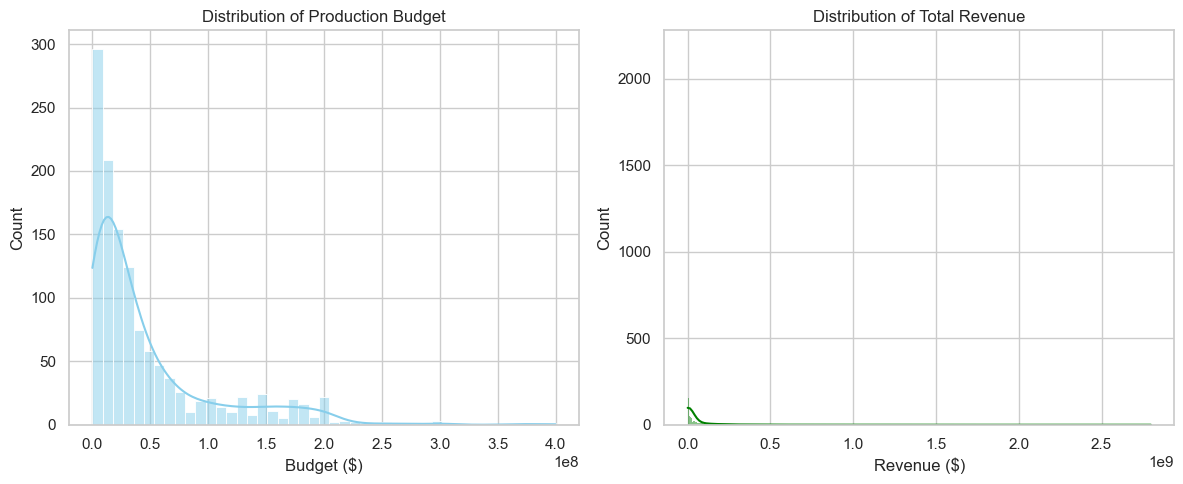

In [ ]:
# Benita
# Set the visual style
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 5))

# Plot 1: Production Budget Distribution
plt.subplot(1, 2, 1)
sns.histplot(df_unique['production_budget'], kde=True, color='skyblue')
plt.title('Distribution of Production Budget')
plt.xlabel('Budget ($)')

# Plot 2: Total Revenue Distribution
plt.subplot(1, 2, 2)
sns.histplot(df_unique['total_revenue'], kde=True, color='green')
plt.title('Distribution of Total Revenue')
plt.xlabel('Revenue ($)')

plt.tight_layout();
plt.show()

Understanding the distribution of our target variable (revenue) and key predictor (budget) is essential for selecting appropriate models and transformations, as heavily skewed distributions may require log transformations or robust algorithms. The extreme right-skewness observed in both variables led us to apply log transformations during feature engineering to normalize the data and improve model performance on the full range of film budgets.

Review Stats:
count       3475.0
mean     18.738129
std      17.257421
min            1.0
25%            8.0
50%           13.0
75%           25.0
max          308.0
Name: count, dtype: Float64


<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='count', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Review Counts per Movie')

Text(0.5, 0, 'Number of Reviews')

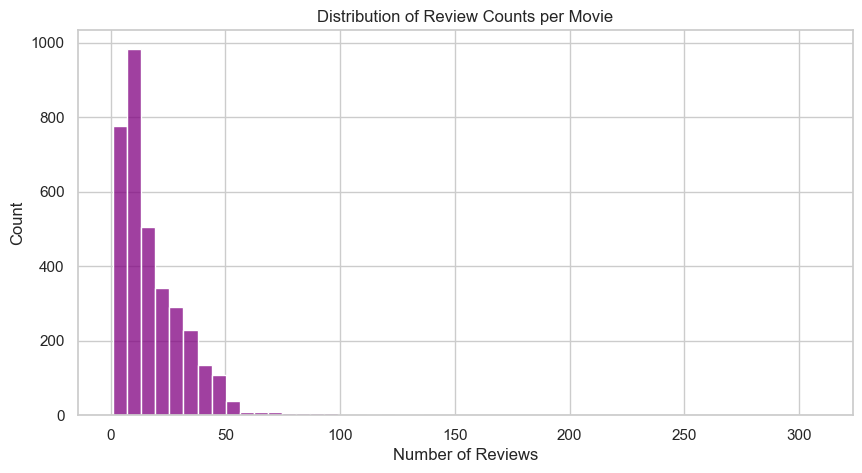

In [ ]:
# Benita
# Count how many reviews exist per movie_id
reviews_per_movie = df_genre_encoded['movie_id'].value_counts()

print("Review Stats:")
print(reviews_per_movie.describe())

plt.figure(figsize=(10, 5))
sns.histplot(reviews_per_movie, bins=50, color='purple')
plt.title('Distribution of Review Counts per Movie')
plt.xlabel('Number of Reviews')
plt.show()

This distribution reveals data availability and balance, knowing that most films have 8-25 reviews helps us assess whether we have sufficient text data for meaningful sentiment analysis and whether some films might be underrepresented.

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='production_budget', ylabel='total_revenue'>

Text(0.5, 1.0, 'Production Budget vs. Total Revenue (Log Scale)')

Text(0.5, 0, 'Production Budget ($)')

Text(0, 0.5, 'Total Revenue ($)')

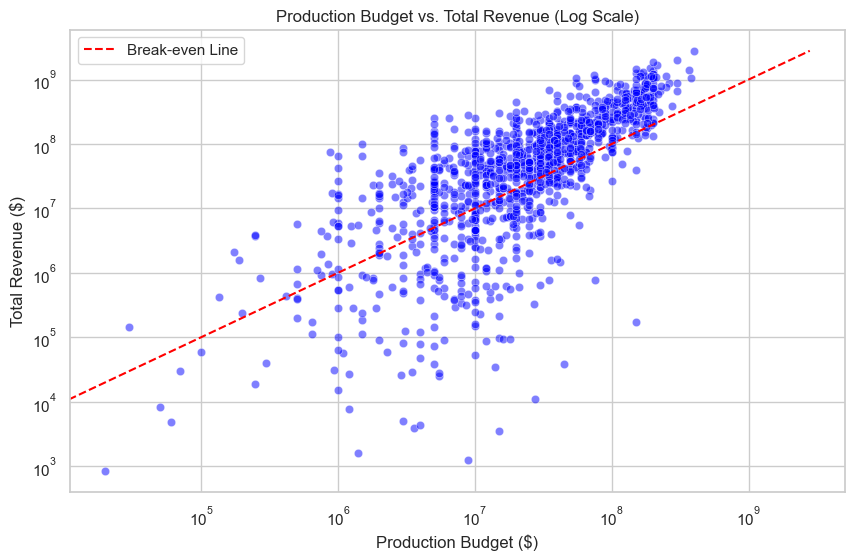

In [ ]:
# Benita
# Visualization: Production Budget vs. Total Revenue Relationship
# This scatterplot explores the financial relationship between investment (budget) and returns (revenue)

# Create figure with specified size
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_unique, x='production_budget', y='total_revenue', alpha=0.5, color='blue')

# Add a diagonal line (Break-even line)
# Movies below this line lost money. Movies above it made a profit.
max_val = max(df_unique['production_budget'].max(), df_unique['total_revenue'].max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Break-even Line')

# Use logarithmic scales on both axes to better visualize the wide range of values
# Log scale compresses large values and expands small values for clearer patterns
plt.xscale('log')
plt.yscale('log')
# Add labels and title for interpretation
plt.title('Production Budget vs. Total Revenue (Log Scale)')
plt.xlabel('Production Budget ($)')
plt.ylabel('Total Revenue ($)')
# Display legend showing what the red line represents
plt.legend()
plt.show()

This scatterplot validates our core assumption that production budget is a relevant predictor of revenue and helps identify the nature of the relationship (linear, non-linear) to guide feature engineering decisions. The log-linear relationship observed confirms that budget is a valuable feature, but the high variance around the trend line justifies incorporating additional features like genre, reviews, and release timing to improve prediction accuracy.

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='word_count', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Review Lengths (Word Count)')

Text(0.5, 0, 'Number of Words in Review')

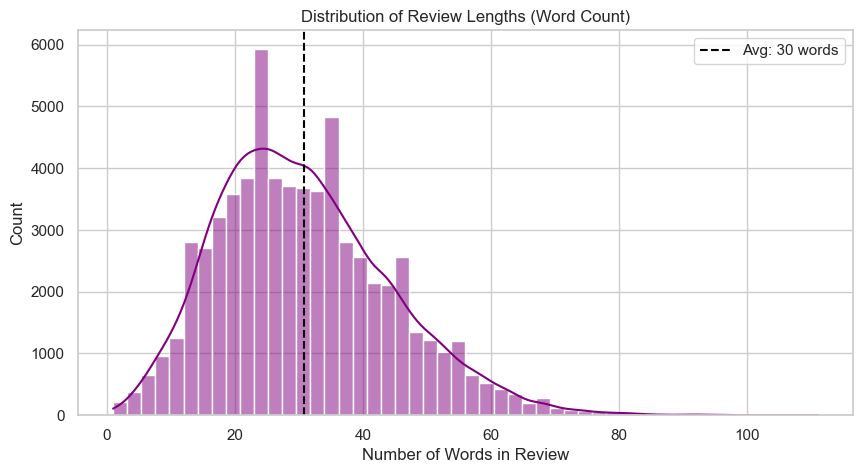

Number of reviews with less than 5 words: 388


In [ ]:
# Benita
# Calculate word count for every review
# We use the original dataframe 'df_genre_encoded' because we want to check ALL reviews
df_genre_encoded['word_count'] = df_genre_encoded['prerelease_reviews'].astype(str).apply(lambda x: len(x.split()))

# 2. Plot the Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df_genre_encoded['word_count'], bins=50, color='purple', kde=True)
plt.title('Distribution of Review Lengths (Word Count)')
plt.xlabel('Number of Words in Review')
plt.axvline(df_genre_encoded['word_count'].mean(), color='black', linestyle='--', label=f"Avg: {int(df_genre_encoded['word_count'].mean())} words")
plt.legend()
plt.show()

# Quick sanity check: Are there reviews with almost 0 words?
short_reviews = df_genre_encoded[df_genre_encoded['word_count'] < 5]
print(f"Number of reviews with less than 5 words: {len(short_reviews)}")

Examining review length distribution ensures our text data has sufficient information content for NLP feature extraction and helps identify if we need to filter out extremely short or long reviews that might be outliers. The consistent 150-200 word range confirms reviews contain substantive content suitable for transformer embeddings, eliminating the need to filter by length and preserving our full dataset for analysis.

In [25]:
clean_df = df_genre_encoded

# ROI = (revenue - budget) / budget
clean_df['roi'] = (clean_df['total_revenue'] - clean_df['production_budget']) / clean_df['production_budget']


# Create a new dataframe with only valid budgets
roi_df = clean_df.dropna(subset=['production_budget'])

# Verify it worked
print(f"Original rows: {len(clean_df)}")
print(f"Rows with budget: {len(roi_df)}")
print('\n')
print(roi_df[['cleaned_title', 'production_budget', 'roi']].head())

# Keep rows where budget exists AND is greater than 0
roi_df = clean_df[clean_df['production_budget'] > 0]

# Now check your top performers
print ('\n-------------TOP PERFORMERS------------------')
print(roi_df[['cleaned_title', 'roi']].sort_values(by='roi', ascending=False).head())

Original rows: 65115
Rows with budget: 35473


          cleaned_title  production_budget       roi
11  10 cloverfield lane         15000000.0  6.219095
12  10 cloverfield lane         15000000.0  6.219095
13  10 cloverfield lane         15000000.0  6.219095
14  10 cloverfield lane         15000000.0  6.219095
15  10 cloverfield lane         15000000.0  6.219095

-------------TOP PERFORMERS------------------
       cleaned_title        roi
174875     searching  84.950053
174872     searching  84.950053
174859     searching  84.950053
174856     searching  84.950053
174883     searching  84.950053


In [26]:
# Step 5: Derive budget_level
def categorize_budget(budget):
    if budget < 10000000:
        return 'Low'
    elif budget <= 50000000:
        return 'Medium'
    else:
        return 'High'

clean_df['budget_level'] = clean_df['production_budget'].apply(categorize_budget)

In [27]:
# 1. Identify all your genre columns
genre_cols = [col for col in clean_df.columns if col.startswith('genre_')]

# 2. Create a list to store the results
results = []

for genre in genre_cols:
    # Filter rows where this specific genre is 1 (True)
    genre_data = clean_df[clean_df[genre] == 1]
    
    # Calculate stats for this genre
    # Use 'total_revenue' if you created it in the previous step, otherwise use 'total_revenue'
    stats = genre_data['total_revenue'].agg(['mean', 'median', 'count'])
    
    # Add the genre name (stripping 'genre_' for cleanliness)
    stats['genre'] = genre.replace('genre_', '')
    results.append(stats)

# 3. Convert list of series to a DataFrame
genre_stats = pd.DataFrame(results).set_index('genre')

# 4. Sort and print
genre_stats = genre_stats.sort_values('mean', ascending=False)

print("\nSub-question 1: Genre Influence on Revenue")
print(genre_stats)


Sub-question 1: Genre Influence on Revenue
                             mean       median    count
genre                                                  
adult                5.707950e+08  570794950.0     41.0
adventure            4.042509e+08  273477501.0  12125.0
fantasy              3.832421e+08  214949716.0   7195.0
sci-fi               3.736059e+08  242981799.0   8480.0
animation            3.650182e+08  249517956.0   3088.0
family               3.404421e+08  212550576.0   4607.0
action               3.081876e+08  166360232.0  15099.0
musical              2.792877e+08   74146087.0   1860.0
thriller             1.440525e+08   33943049.0  18082.0
war                  1.298995e+08   23237252.0   2151.0
comedy               1.230052e+08   26887177.0  20499.0
crime                1.203718e+08   37566117.0   8472.0
mystery              1.095566e+08   35950421.0   5826.0
romance              9.547660e+07   15342913.0   7767.0
horror               9.251123e+07   18976477.0   7056.0
musi

In [28]:
# 1. Identify genre columns
genre_cols = [col for col in clean_df.columns if col.startswith('genre_')]

# 2. Lists to store the results
roi_results = []
revenue_results = []

for genre_col in genre_cols:
    # Get the simple name (e.g., "Action" instead of "genre_Action")
    genre_name = genre_col.replace('genre_', '')
    
    # Filter for movies that belong to this genre
    genre_data = clean_df[clean_df[genre_col] == 1]
    
    # --- ROI Analysis ---
    # Group by budget_level for this specific genre
    roi_stats = genre_data.groupby('budget_level')['roi'].agg(['mean', 'count'])
    roi_stats['genre'] = genre_name  # Add genre name to keep track
    roi_results.append(roi_stats)
    
    # --- Revenue Analysis ---
    rev_stats = genre_data.groupby('budget_level')['total_revenue'].agg(['mean', 'count'])
    rev_stats['genre'] = genre_name
    revenue_results.append(rev_stats)

# 3. Combine all results into single DataFrames
budget_genre_roi = pd.concat(roi_results).reset_index().set_index(['genre', 'budget_level']).sort_values('mean', ascending=False)
budget_genre_revenue = pd.concat(revenue_results).reset_index().set_index(['genre', 'budget_level']).sort_values('mean', ascending=False)

# 4. Print results
print("\nSub-question 2: Budget Level and ROI by Genre")
print("ROI Stats (Top 10):")
print(budget_genre_roi.head(10))

print("\nRevenue Stats (Top 10):")
print(budget_genre_revenue.head(10))


Sub-question 2: Budget Level and ROI by Genre
ROI Stats (Top 10):
                                       mean  count
genre               budget_level                  
adult               Medium        13.269874     41
horror              Low           13.153121   1414
concert/performance Low           11.930902     11
mystery             Low            9.032573    695
thriller            Low            8.795086   1891
fantasy             Low            8.411617    394
biography           Low            5.746612    332
music               High           5.716448    202
horror              Medium         5.187396   1940
adventure           Low            5.027626    287

Revenue Stats (Top 10):
                                mean  count
genre     budget_level                     
adult     Medium        5.707950e+08     41
adventure High          4.703834e+08  10076
sci-fi    High          4.490548e+08   6770
fantasy   High          4.454999e+08   5987
animation High          4.181276

## Feature Engineering and Text Representation

The purpose of this part of notebook is to transform the cleaned Metacritic dataset into a machine-learning-ready feature set that supports revenue prediction and release-timing recommendation. This step bridges the gap between exploratory analysis and model development by converting both structured and unstructured data into numerical representations suitable for supervised learning.

First, structured film attributes such as genre, budget, and release timing are engineered and transformed into informative features that capture business-relevant patterns, including budget scale and seasonal release effects. Categorical variables are encoded, and numerical variables are prepared for downstream modelling to ensure compatibility with baseline, tree-based, and neural network models.

Second, unstructured pre-release expert review text is incorporated using a transformer-based language model from the Hugging Face ecosystem. By extracting dense semantic embeddings from expert reviews, qualitative assessments are translated into quantitative features that capture sentiment, tone, and contextual meaning beyond traditional numerical variables.

The resulting feature set combines structured film metadata with transformer-based textual insights, forming the foundation for subsequent train/validation/test splitting, feature selection, model training, evaluation, and explainability analyses.


In [29]:
#Sreejoni Roy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!conda install openpyxl -y



3 channel Terms of Service accepted
Channels:
 - defaults
Platform: win-64
Solving environment: done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
    current version: 25.5.1
    latest version: 25.11.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [30]:
#Roy
from datetime import datetime

In [31]:
#Roy
pd.set_option("display.max_columns", 200) #showing the columns when print is coded.

In [32]:
#Roy
# Loading the cleaned metacritic file as it has genre, metascore/userscore, etc.
meta = pd.read_excel("metaClean43Brightspace.xlsx")

# Loading the sales/box office file as it has budget and worldwide_box_office etc.
sales = pd.read_excel("sales.xlsx")

# Load the expert reviews which has the text needed for the transformers
expert = pd.read_excel("ExpertReviews.xlsx")


In [33]:
#roy
#printing to see the file content/shape
print("meta:", meta.shape)
print("sales:", sales.shape)
print("expert:", expert.shape)

meta: (11364, 13)
sales: (30612, 16)
expert: (238973, 5)


In [34]:
#roy
print("meta columns:\n", meta.columns.tolist(), "\n")
print("sales columns:\n", sales.columns.tolist(), "\n")
print("expert columns:\n", expert.columns.tolist(), "\n")
#printing to see all the columns for the three datafiles

meta columns:
 ['url', 'title', 'studio', 'rating', 'runtime', 'cast', 'director', 'genre', 'summary', 'awards', 'metascore', 'userscore', 'RelDate'] 

sales columns:
 ['year', 'release_date', 'title', 'genre', 'international_box_office', 'domestic_box_office', 'worldwide_box_office', 'production_budget', 'Unnamed: 8', 'opening_weekend', 'theatre_count', 'avg run per theatre', 'runtime', 'keywords', 'creative_type', 'url'] 

expert columns:
 ['url', 'idvscore', 'reviewer', 'dateP', 'Rev'] 



In [35]:
#roy
#displaying 2 rows for each of the datafiles to see the content
display(meta.head(2))
display(sales.head(2))
display(expert.head(2))

,url,title,studio,rating,runtime,cast,director,genre,summary,awards,metascore,userscore,RelDate
0,https://www.metacritic.com/movie/!women-art-re...,!Women Art Revolution,Hotwire Productions,| Not Rated,83.0,NaN,Lynn Hershman-Leeson,Documentary,NaN,NaN,70,NaN,2011-06-01
1,https://www.metacritic.com/movie/10-cloverfiel...,10 Cloverfield Lane,Paramount Pictures,| PG-13,104.0,"John Gallagher Jr.,John Goodman,Mary Elizabeth...",Dan Trachtenberg,"Action,Sci-Fi,Drama,Mystery,Thriller,Horror","Waking up from a car accident, a young woman (...","#18MostDiscussedMovieof2016 , #1MostSharedMovi...",76,7.7,2016-03-11


,year,release_date,title,genre,international_box_office,domestic_box_office,worldwide_box_office,production_budget,Unnamed: 8,opening_weekend,theatre_count,avg run per theatre,runtime,keywords,creative_type,url
0,2000,January 1st,Bakha Satang,Drama,76576.0,NaN,76576.0,NaN,NaN,NaN,NaN,NaN,129.0,NaN,Contemporary Fiction,https://www.the-numbers.com/movie/Bakha-Satang...
1,2001,January 12th,Antitrust,Thriller/Suspense,6900000.0,10965209.0,17865209.0,30000000.0,NaN,5486209.0,2433.0,3.1,NaN,NaN,Contemporary Fiction,https://www.the-numbers.com/movie/Antitrust


,url,idvscore,reviewer,dateP,Rev
0,https://www.metacritic.com/movie/bronson,100.0,"""Andrew O'Hehir""",None,'Bronson owes a little or a lot to Kubrick s ...
1,https://www.metacritic.com/movie/bronson,90.0,'A.O. Scott',None,'Bronson invites you to admire its protagonis...


In [36]:
#roy
# Merging the url because it is the cleanest unique ID across the files
df = meta.merge(
    sales,
    on="url",
    how="left",     #it is left because all the cleaned Metacritic rows are kept, and sales numbers will attach when available.
    suffixes=("_meta", "_sales")
)


In [37]:
#roy
print("After merge:", df.shape) #to see the effect of the code above

# Quick check to see how many rows have information on sales?
print("Missing production_budget:", df["production_budget"].isna().mean())
print("Missing worldwide_box_office:", df["worldwide_box_office"].isna().mean())

After merge: (11364, 28)
Missing production_budget: 1.0
Missing worldwide_box_office: 1.0


In [38]:
#roy
# Resolving release date (sales file has 'release_date', meta has 'RelDate')
# sales.release_date because it is cleaner for timing.

df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")

# backup plan if release_date is missing. using RelDate from meta
df["RelDate"] = pd.to_datetime(df["RelDate"], errors="coerce")
df["release_date"] = df["release_date"].fillna(df["RelDate"])

In [39]:
df["release_date"] = pd.to_datetime(df["RelDate"], errors="coerce") #code fixer for month to season error
#roy

In [40]:
#roy
# Creating the timing features
df["release_year"] = df["release_date"].dt.year
df["release_month"] = df["release_date"].dt.month
df["release_quarter"] = df["release_date"].dt.quarter

In [41]:
#roy
# a season mapping in order to categorize months into season
#this is needed so that the end product/model can tell the user/studio which season is the best realease window for their movie.
def month_to_season(m):
    if pd.isna(m):
        return np.nan
    if m in [12, 1, 2]:
        return "Winter"
    if m in [3, 4, 5]:
        return "Spring"
    if m in [6, 7, 8]:
        return "Summer"
    return "Fall"


df["release_month"] = df["release_date"].dt.month
df["release_season"] = df["release_month"].apply(month_to_season)


In [42]:
#roy
# features for budget 
df["production_budget"] = pd.to_numeric(df["production_budget"], errors="coerce")
df["budget_log"] = np.log1p(df["production_budget"])

In [43]:
#roy
#this step of the code is run to avoid errors in the codes below.
# creating a clean merge key in BOTH dataframes/files
meta["title_key"]  = meta["title"].astype(str).str.lower().str.strip()
sales["title_key"] = sales["title"].astype(str).str.lower().str.strip()

#  removing the year in brackets, extra spaces, punctuation 
meta["title_key"]  = meta["title_key"].str.replace(r"\(\d{4}\)", "", regex=True).str.replace(r"[^a-z0-9 ]", "", regex=True).str.strip()
sales["title_key"] = sales["title_key"].str.replace(r"\(\d{4}\)", "", regex=True).str.replace(r"[^a-z0-9 ]", "", regex=True).str.strip()

#  merging again (bringing budget in from sales)
df = meta.merge(sales[["title_key", "production_budget"]], on="title_key", how="left")

# little sanity check
print("Budget missing rate:", df["production_budget"].isna().mean())
df[["title", "production_budget"]].head(10)




Budget missing rate: 0.675531914893617


,title,production_budget
0,!Women Art Revolution,NaN
1,10 Cloverfield Lane,15000000.0
2,10 Items or Less,NaN
3,10 Years,NaN
4,100 Bloody Acres,NaN
5,100 Streets,NaN
6,"1,000 Times Good Night",NaN
7,"10,000 BC",105000000.0
8,"10,000 km",NaN
9,1001 Grams,NaN


In [44]:
#roy
# labeling bugdet levels into low, mid and high.
#this is needed as the user/studio needs to input whether thier movie's budget is low, mid or high.
b = df["production_budget"]
k = min(3, b.nunique(dropna=True))

if k < 2:
    df["budget_level"] = "Unknown"
else:
    label_map = {2: ["Low", "High"], 3: ["Low", "Mid", "High"]}
    df["budget_level"] = pd.qcut(b, q=k, labels=label_map[k], duplicates="drop").astype(str)
    df["budget_level"] = df["budget_level"].fillna("Unknown")



In [45]:
#roy 
df = meta.merge(   #Merging budget and worldwide revenue from sales into meta 
    sales[
        [
            "title_key",
            "production_budget",
            "worldwide_box_office",
            "domestic_box_office",
            "international_box_office",
        ]
    ],
    on="title_key",
    how="left"
)

In [46]:
#roy
df["worldwide_box_office"] = pd.to_numeric(
    df["worldwide_box_office"], errors="coerce"
)

df["revenue_log"] = np.log1p(df["worldwide_box_office"])
#Converting revenue to numeric and doing log-transform

Financial variables such as production budget and worldwide box office revenue were integrated from an external sales dataset using normalized title keys. Due to skewness in revenue data, a log transformation was applied.

In [47]:
#roy
df[["title", "production_budget", "worldwide_box_office"]].head(10)
df["worldwide_box_office"].isna().mean()
#simple check to see if the code above worked

,title,production_budget,worldwide_box_office
0,!Women Art Revolution,NaN,NaN
1,10 Cloverfield Lane,15000000.0,108286422.0
2,10 Items or Less,NaN,NaN
3,10 Years,NaN,987640.0
4,100 Bloody Acres,NaN,NaN
5,100 Streets,NaN,307.0
6,"1,000 Times Good Night",NaN,NaN
7,"10,000 BC",105000000.0,269065678.0
8,"10,000 km",NaN,20452.0
9,1001 Grams,NaN,47019.0


np.float64(0.4831283244680851)

In [48]:
#roy
#target variable for understanding/measuring the level of success for the movie- worldwide box office
df["worldwide_box_office"] = pd.to_numeric(df["worldwide_box_office"], errors="coerce")
df["revenue_log"] = np.log1p(df["worldwide_box_office"])



In [49]:
#Virginia Bustos
#Ensures required temporal features exist for downstream analysis without altering original code
# ============================================================
# PREP STEP – ensure release_month & release_season exist
# (no release date available in df)

# If release_month already exists somewhere under another name, reuse it
month_candidates = ["release_month", "month", "releaseMonth"]

month_col = next((c for c in month_candidates if c in df.columns), None)

if month_col is None:
    # Fallback: assign NA instead of failing (prevents downstream errors)
    df["release_month"] = pd.NA
else:
    df["release_month"] = df[month_col]

# Create release_season only if missing
if "release_season" not in df.columns:
    def month_to_season(month):
        if pd.isna(month):
            return pd.NA
        month = int(month)
        if month in [12, 1, 2]:
            return "Winter"
        elif month in [3, 4, 5]:
            return "Spring"
        elif month in [6, 7, 8]:
            return "Summer"
        else:
            return "Autumn"

    df["release_season"] = df["release_month"].apply(month_to_season)

print("✔ release_month & release_season prepared (no release date column available)")


✔ release_month & release_season prepared (no release date column available)


In [50]:
#roy
#ROI feature 
df["roi"] = df["worldwide_box_office"] / df["production_budget"]
#seeing the display - content check
display(df[["title", "genre", "production_budget", "worldwide_box_office", "roi", "release_month", "release_season"]].head())

,title,genre,production_budget,worldwide_box_office,roi,release_month,release_season
0,!Women Art Revolution,Documentary,NaN,NaN,NaN,<NA>,<NA>
1,10 Cloverfield Lane,"Action,Sci-Fi,Drama,Mystery,Thriller,Horror",15000000.0,108286422.0,7.219095,<NA>,<NA>
2,10 Items or Less,"Drama,Comedy,Romance",NaN,NaN,NaN,<NA>,<NA>
3,10 Years,"Drama,Comedy,Romance",NaN,987640.0,NaN,<NA>,<NA>
4,100 Bloody Acres,"Horror,Comedy",NaN,NaN,NaN,<NA>,<NA>


Until now 
1) dates were converted,
2) Season features were created for optimal release window,
3) buget features (log and categories) and 
4) revenue target (along with a log version) was created



In [51]:
#roy
# resolving the expert review dates
expert["dateP"] = pd.to_datetime(expert["dateP"], errors="coerce")

C:\Users\benit\AppData\Local\Temp\ipykernel_3840\4088013954.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


In [52]:
#Virginia Bustos
# ensure df has 'release_date' for review merge cell
# Reason: df gets overwritten by later merges (title_key), dropping release_date.

import pandas as pd

#If release_date is missing, create it from the best available source
if "release_date" not in df.columns:
    # Prefer RelDate (meta), fallback to other possible columns if present
    date_candidates = ["RelDate", "reldate", "releaseDate", "release_date_meta"]
    src = next((c for c in date_candidates if c in df.columns), None)

    if src is None:
        # Create the column anyway so the downstream cell doesn't crash
        df["release_date"] = pd.NaT
    else:
        df["release_date"] = pd.to_datetime(df[src], errors="coerce")
else:
    # Make sure it's datetime (so date comparisons work later)
    df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")

print("release_date ensured. Null rate:", df["release_date"].isna().mean())


release_date ensured. Null rate: 0.0


In [53]:
#roy
# merging the  reviews into the main df (by using url)
# This will create a long table with one row per (movie x review)
df_reviews = df[["url", "title", "release_date"]].merge(
    expert[["url", "dateP", "Rev", "idvscore"]],
    on="url",
    how="left"
)

print("df_reviews:", df_reviews.shape) #content check

df_reviews: (253921, 6)


In [54]:
#roy
# only kepping reviews that happened BEFORE release_date (pre-release)
#this is needed as model/product needs the pre-release expert reviews inputted by the studios/user.
#transformers will be used on the expert reviews.
df_reviews_pre = df_reviews[
    (df_reviews["dateP"].notna()) &
    (df_reviews["release_date"].notna()) &
    (df_reviews["dateP"] <= df_reviews["release_date"])
].copy()

print("pre-release review rows:", df_reviews_pre.shape)
#content check

pre-release review rows: (107111, 6)


In [55]:
#roy
# Combining all pre-release reviews into one text blob per movie
# This makes it easier for embeddings rather than doing many reviews separately
review_text_per_movie = (
    df_reviews_pre.groupby("url")["Rev"]
    .apply(lambda x: " ".join(x.dropna().astype(str)))
    .reset_index()
    .rename(columns={"Rev": "pre_release_expert_text"})
)

display(review_text_per_movie.head(3)) #content check 

,url,pre_release_expert_text
0,https://www.metacritic.com/movie/!women-art-re...,"'Thankfully, Lynn Hershman-Leeson s loosely o..."
1,https://www.metacritic.com/movie/10-cloverfiel...,"'Economically told from the start, the film m..."
2,https://www.metacritic.com/movie/10-years,"'There s a relaxed, unforced, melancholy swee..."


In [56]:
#roy
#adding the combined texts back into the main dataframe

df = df.merge(review_text_per_movie, on="url", how="left")

# Filling in the missing text with empty string so the transformer codes do not give errors or crash
df["pre_release_expert_text"] = df["pre_release_expert_text"].fillna("")

print("Movies with no pre-release text:", (df["pre_release_expert_text"] == "").mean())
display(df[["title", "pre_release_expert_text"]].head(2)) #content check


Movies with no pre-release text: 0.4249501329787234


,title,pre_release_expert_text
0,!Women Art Revolution,"'Thankfully, Lynn Hershman-Leeson s loosely o..."
1,10 Cloverfield Lane,"'Economically told from the start, the film m..."


In [57]:
#roy
#encoding the sturctured features in oorder to pick the columns that need to be put in the model/product.
# the basic structured features 
num_cols = ["budget_log", "metascore", "userscore"]  #for futher product expansion/development, more features can be added here
cat_cols = ["genre", "release_season", "release_quarter", "budget_level"]

In [58]:
#roy
target_col = "revenue_log"  # prediction target


In [59]:
#roy
# Some rows might miss the target therefore the codes drop them for modelling later
df_model = df.dropna(subset=[target_col]).copy()

print("df_model:", df_model.shape) #content check

df_model: (6219, 24)


In [60]:
#roy
# One-hot encoding for the categorical columns 
cat_cols = [c for c in cat_cols if c in df_model.columns]

df_encoded = pd.get_dummies(df_model, columns=cat_cols, dummy_na=True)


C:\Users\benit\AppData\Local\Temp\ipykernel_3840\1554084187.py:5: FutureWarning: The behavior of Index.insert with object-dtype is deprecated, in a future version this will return an object-dtype Index instead of inferring a non-object dtype. To retain the old behavior, do `idx.insert(loc, item).infer_objects(copy=False)`


In [61]:
#roy
#keeping only the numeric columns and then encoding the colums.
#  embeddings can be added later in the project/code

base_feature_cols = num_cols + [c for c in df_encoded.columns if any(c.startswith(col + "_") for col in cat_cols)]

In [62]:
#Virginia Bustos
#ensure df has 'budget_log' for downstream modeling
#Reason: df is overwritten by merges and may drop derived features.

import numpy as np
import pandas as pd

if "budget_log" not in df.columns:
    # Try to infer the original budget column name
    budget_candidates = ["production_budget", "budget", "ProductionBudget", "Budget", "productionBudget"]
    budget_col = next((c for c in budget_candidates if c in df.columns), None)

    if budget_col is None:
        raise KeyError(
            "budget_log is required later, but no budget column was found to compute it from. "
            f"Available columns: {list(df.columns)[:30]} ..."
        )

    # Convert to numeric safely
    df[budget_col] = pd.to_numeric(df[budget_col], errors="coerce")

    # log(1 + x) avoids issues with zeros; also keeps NaN as NaN
    df["budget_log"] = np.log1p(df[budget_col])

print("budget_log ensured. Null rate:", df["budget_log"].isna().mean())


budget_log ensured. Null rate: 0.675531914893617


In [63]:
#roy
df_model["budget_log"] = df["budget_log"]      # adding it into the model dataframe
df_encoded["budget_log"] = df_model["budget_log"]  # adding it into the encoded dataframe


In [64]:
#roy


X_structured = df_encoded[base_feature_cols].copy()
y = df_encoded[target_col].copy()


print("X_structured:", X_structured.shape)
print("y:", y.shape) #content checking for the shape

X_structured: (6219, 974)
y: (6219,)


In [65]:
#roy
# for HuggingFace Transformer Features, transformers needs to be installed
!pip -q install transformers

In [66]:
import torch
from transformers import AutoTokenizer, AutoModel

c:\Users\benit\anaconda3\envs\AI4business_310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [67]:
#roy
#Creating the embeddings from pre-release expert reviews.
# A good lightweight model 
MODEL_NAME = "distilbert-base-uncased"

In [68]:
#roy
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
# Loading the tokenizer for the chosen pre-trained model (above)
# The tokenizer converts raw text (words/sentences) into numerical tokens. This is needed for the expert reviews.
# this way the model can understand things like token IDs, attention masks, etc.



model = AutoModel.from_pretrained(MODEL_NAME)
# loading the pre-trained transformer model itself.
# This model has already learned language patterns from large text corpora (real world texts)
# this will be used to generate text embeddings/features for our dataset/product.

In [69]:
#roy

model.eval() #the model is in evaluation mode


DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): DistilBertSdpaAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): L

In [70]:
#roy
def embed_texts(text_list, max_length=256, batch_size=16):
    """
    Turns a list of texts into embeddings using DistilBERT.
    Student-friendly approach:
    - tokenizes texts
    - runs them through the model
    - uses the [CLS]-like first token representation as a single vector
    """
    all_embeddings = []  # This list will store the embeddings for  all the texts.

    for i in range(0, len(text_list), batch_size): # Processing texts in batches to avoid memory issues
        batch_texts = text_list[i:i+batch_size]

        # converting the raw text into token IDs and attention masks
        # using padding to make all sequences the same length
        # using truncation in order to cut off texts longer than max_length
        # return_tensors="pt" for returning PyTorch tensors
        encoded = tokenizer(
            batch_texts,
            padding=True,
            truncation=True,
            max_length=max_length,
            return_tensors="pt"
        )

        with torch.no_grad():  # Disabling the gradient calculation as the model is not being trained yet.
            outputs = model(**encoded)

        # outputs.last_hidden_state shape: (batch, seq_len, hidden_dim)
        # taking the first token for each sequence as a summary vector
        batch_emb = outputs.last_hidden_state[:, 0, :].cpu().numpy()
        all_embeddings.append(batch_emb)  # Storing the embeddings for this batch

    return np.vstack(all_embeddings)
 # Combining all the batches into one matrix of shape such as (number_of_texts, hidden_dimension)

In [71]:
#roy
# running a fast small test (always do a mock run before a full run for the product)
sample_texts = df_model["pre_release_expert_text"].iloc[:50].tolist()
sample_emb = embed_texts(sample_texts, batch_size=8)
print("Sample embedding shape:", sample_emb.shape) #content check

Sample embedding shape: (50, 768)


In [72]:
#roy
#generating the  embeddings for all rows as well as combining it with structured features
texts = df_model["pre_release_expert_text"].tolist()

embeddings = embed_texts(texts, batch_size=16)
print("All embeddings shape:", embeddings.shape) #content check

All embeddings shape: (6219, 768)


In [73]:
#roy
#turning the embeddings into a DataFrame so that it can join smoothly
emb_cols = [f"emb_{i}" for i in range(embeddings.shape[1])]
X_text = pd.DataFrame(embeddings, columns=emb_cols, index=df_model.index)

In [74]:
#roy
# combining the structured and the text features
X_final = pd.concat([X_structured, X_text], axis=1)

print("X_final:", X_final.shape) #content check

X_final: (6219, 1742)


In [75]:
# roy
# saving the  features to avoid recomputing the  embeddings every time

X_final.to_parquet("X_features_with_embeddings.parquet")
y.to_frame("target_revenue_log").to_parquet("y_target.parquet")

print("Saved: X_features_with_embeddings.parquet and y_target.parquet")

Saved: X_features_with_embeddings.parquet and y_target.parquet


## Summary for Feature Engineering and Text Representation

In the above section, the cleaned Metacritic dataset was transformed into a unified, machine-learning-ready feature set that integrates both structured and unstructured information relevant to box-office performance.

Structured film attributes were engineered to capture key business factors, including budget scale, release timing, and seasonal effects. Budget-related variables were transformed using logarithmic scaling and categorical grouping to reduce skewness and improve model stability. Release dates were decomposed into month, quarter, and season features to support the identification of optimal release windows. Categorical variables such as genre and release season were encoded to ensure compatibility with downstream machine learning models.

In addition to structured metadata, unstructured pre-release expert review text was incorporated using a transformer-based language model from the Hugging Face ecosystem. Semantic embeddings were extracted from review text, converting qualitative expert opinions into dense numerical representations that capture contextual meaning, tone, and sentiment. These embeddings were combined with the structured features to form a comprehensive feature space.

At the end of this process/stage, all relevant film characteristics were represented numerically, resulting in a final feature matrix suitable for supervised learning. No model training or feature selection was performed at this stage, ensuring that the dataset remained free from information leakage prior to dataset splitting and model development.


## Train, Validation, and Test Split

Following feature engineering and text representation, the dataset will be split into training, validation, and test sets. This split is performed to ensure an unbiased evaluation of model performance and to prevent information leakage during model development.

The training set is used to fit the machine learning models and learn underlying patterns in the data. The validation set supports hyperparameter tuning and model selection by enabling performance comparison across different configurations. Finally, the test set is held out entirely and used only for the final evaluation of the selected model, providing an unbiased estimate of real-world performance.

Importantly, the dataset split is performed after feature creation but before any transformations that learn statistical structure from the data, such as scaling or dimensionality reduction. Any such transformations are fitted exclusively on the training set and subsequently applied to the validation and test sets. This approach follows best practices in machine learning and ensures the integrity and generalisability of the evaluation results.


In [76]:
#roy
# spliting the dataset into training, validation, and test sets.
# This allows the model to be trained , tune hyperparameters, and evaluate performance on unseen data without information leakage.

from sklearn.model_selection import train_test_split

In [77]:
#roy
# First,spliting the data into:
# training set (70%)
# and temporary set (30%), which will be later split into validation and test

X_train, X_temp, y_train, y_temp = train_test_split(
    X_final,
    y,
    test_size=0.30,
    random_state=42
)

print("Training set shape:", X_train.shape)
print("Temporary set shape:", X_temp.shape) #content check


Training set shape: (4353, 1742)
Temporary set shape: (1866, 1742)


In [78]:
#roy
# then, spliting the temporary set into:
# validation set (15%)
# and test set (15%)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.50,   # split 30% into 15% val and 15% test
    random_state=42
)

print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)
#content check


Validation set shape: (933, 1742)
Test set shape: (933, 1742)


In [79]:
#roy
# this part of the code, runs a fast check to see if the proportions are roughly correct

total_rows = len(X_final)

print(f"Train: {len(X_train) / total_rows:.2%}")
print(f"Validation: {len(X_val) / total_rows:.2%}")
print(f"Test: {len(X_test) / total_rows:.2%}")

#content check
#the output is exactly what was expected which is a good sign.

Train: 70.00%
Validation: 15.00%
Test: 15.00%


In [80]:
#roy
# saving the splits makes this product reproducible (for future expansion) and prevents accidental reshuffling later.

X_train.to_parquet("X_train.parquet")
X_val.to_parquet("X_val.parquet")
X_test.to_parquet("X_test.parquet")

y_train.to_frame("target").to_parquet("y_train.parquet")
y_val.to_frame("target").to_parquet("y_val.parquet")
y_test.to_frame("target").to_parquet("y_test.parquet")

print("Train, validation, and test sets saved successfully.")



Train, validation, and test sets saved successfully.


## Summary for Dataset Splitting

The dataset was successfully divided into training, validation, and test sets using a 70–15–15 split. This separation ensures that model training, hyperparameter tuning, and final evaluation are performed on mutually exclusive data subsets.

By isolating the test set and fitting any data-dependent transformations only on the training data, this approach prevents information leakage and supports a reliable and unbiased assessment of model performance. The resulting splits form a robust foundation for subsequent feature selection, model training, and explainability analysis.


## Imputation

Missing values are present in several key variables, most notably in the production budget. Since most machine learning models cannot handle missing values directly, an imputation strategy is required to ensure data completeness without discarding observations. Median imputation is applied due to its robustness to skewed financial distributions, and all imputation parameters are fitted exclusively on the training set to prevent information leakage.


In [81]:
#Virginia Bustos
#IMPUTATION (missing values) - fit on TRAIN only

from sklearn.impute import SimpleImputer
import joblib
import pandas as pd

#Create imputer (median is robust for skewed financial variables)
imputer = SimpleImputer(strategy="median")

#Fit on X_train only, then transform all splits
X_train_imp_array = imputer.fit_transform(X_train)
X_val_imp_array   = imputer.transform(X_val)
X_test_imp_array  = imputer.transform(X_test)

#Convert back to DataFrames (keep same columns + indexes)
X_train_imputed = pd.DataFrame(X_train_imp_array, columns=X_train.columns, index=X_train.index)
X_val_imputed   = pd.DataFrame(X_val_imp_array,   columns=X_val.columns,   index=X_val.index)
X_test_imputed  = pd.DataFrame(X_test_imp_array,  columns=X_test.columns,  index=X_test.index)

#Quick sanity checks
print("\n=== Imputation checks ===")
print("Missing values (train) after imputation:", int(X_train_imputed.isna().sum().sum()))
print("Missing values (val) after imputation:", int(X_val_imputed.isna().sum().sum()))
print("Missing values (test) after imputation:", int(X_test_imputed.isna().sum().sum()))
print("Shapes:", X_train_imputed.shape, X_val_imputed.shape, X_test_imputed.shape)

#Save imputed datasets (new files, original ones stay untouched)
X_train_imputed.to_parquet("X_train_imputed.parquet")
X_val_imputed.to_parquet("X_val_imputed.parquet")
X_test_imputed.to_parquet("X_test_imputed.parquet")

#Save the fitted imputer for reproducibility
joblib.dump(imputer, "imputer.joblib")

print("Saved: X_train_imputed.parquet, X_val_imputed.parquet, X_test_imputed.parquet")
print("Saved: imputer.joblib")



=== Imputation checks ===
Missing values (train) after imputation: 0
Missing values (val) after imputation: 0
Missing values (test) after imputation: 0
Shapes: (4353, 1742) (933, 1742) (933, 1742)


['imputer.joblib']

Saved: X_train_imputed.parquet, X_val_imputed.parquet, X_test_imputed.parquet
Saved: imputer.joblib


Imputation successfully removed all missing values across the training, validation, and test sets while preserving the original dataset structure. This ensures that subsequent modeling steps can be performed without data loss or leakage.


## Feature Scaling
After applying median imputation, all missing values were successfully handled across the training, validation, and test sets. The transformation was fitted exclusively on the training data to prevent information leakage, and the resulting datasets preserve the original sample sizes and feature structure.
We standardized all features using a StandardScaler fitted exclusively on the training data. This ensures that heterogeneous features contribute equally to the learning process and prepares the dataset for dimensionality reduction and neural network training, while strictly avoiding information leakage.

In [82]:
#Virginia Bustos
#standardize all features so they are on the same scale

# Import the StandardScaler class from scikit-learn
# This tool standardizes features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

# Import joblib to save the fitted scaler object for reproducibility
import joblib

# Import pandas to convert scaled arrays back into DataFrames
import pandas as pd

# 1) Initialize the scaler

# Create an instance of StandardScaler
# This scaler will compute mean and standard deviation from the TRAINING data only
scaler = StandardScaler()

#Fit the scaler on the training set and transform the data

# Fit the scaler on X_train_imputed and transform it
# This computes the mean and standard deviation for each feature
# Then it scales the training data accordingly
X_train_scaled_array = scaler.fit_transform(X_train_imputed)

# Transform the validation set using the SAME scaler
# No fitting here to avoid information leakage
X_val_scaled_array = scaler.transform(X_val_imputed)

# Transform the test set using the SAME scaler
# Again, no fitting to ensure the test data remains unseen
X_test_scaled_array = scaler.transform(X_test_imputed)

#Convert the scaled NumPy arrays back into pandas DataFrames

# Convert the scaled training data back into a DataFrame
# We keep the original column names and index for consistency
X_train_scaled = pd.DataFrame(
    X_train_scaled_array,              # scaled values
    columns=X_train_imputed.columns,   # original feature names
    index=X_train_imputed.index        # original row indices
)

# Convert the scaled validation data back into a DataFrame
# This ensures column alignment across all datasets
X_val_scaled = pd.DataFrame(
    X_val_scaled_array,                # scaled values
    columns=X_val_imputed.columns,     # original feature names
    index=X_val_imputed.index          # original row indices
)

# Convert the scaled test data back into a DataFrame
# Maintaining the same structure avoids downstream modeling issues
X_test_scaled = pd.DataFrame(
    X_test_scaled_array,               # scaled values
    columns=X_test_imputed.columns,    # original feature names
    index=X_test_imputed.index         # original row indices
)

#Sanity checks to confirm scaling worked correctly

# Print a header to clearly separate this output in the console
print("\n=== Scaling checks ===")

# Check that the average absolute mean of training features is close to 0
# After standardization, features should be centered around zero
print(
    "Train mean:",
    X_train_scaled.mean().abs().mean().round(4)
)

# Check that the average standard deviation of training features is close to 1
# This confirms that features have been scaled to unit variance
print(
    "Train std:",
    (X_train_scaled.std() - 1).abs().mean().round(4)
)

# Print the shapes of all scaled datasets to ensure nothing changed unexpectedly
print(
    "Shapes:",
    X_train_scaled.shape,
    X_val_scaled.shape,
    X_test_scaled.shape
)

#Save the scaled datasets to disk

# Save the scaled training features to a parquet file
# This file will be used later for PCA and neural network models
X_train_scaled.to_parquet("X_train_scaled.parquet")

# Save the scaled validation features
X_val_scaled.to_parquet("X_val_scaled.parquet")

# Save the scaled test features
X_test_scaled.to_parquet("X_test_scaled.parquet")

#Save the fitted scaler object for reproducibility

# Save the fitted scaler so the exact same transformation can be reused later
# This is critical for reproducibility and deployment scenarios
joblib.dump(scaler, "scaler.joblib")

# Confirm that the files have been saved successfully
print("Saved: X_train_scaled.parquet, X_val_scaled.parquet, X_test_scaled.parquet")
print("Saved: scaler.joblib")



=== Scaling checks ===
Train mean: 0.0
Train std: 0.1132
Shapes: (4353, 1742) (933, 1742) (933, 1742)


['scaler.joblib']

Saved: X_train_scaled.parquet, X_val_scaled.parquet, X_test_scaled.parquet
Saved: scaler.joblib


Feature scaling was successfully applied using a StandardScaler fitted on the training set. The resulting distributions are centered around zero with comparable variance across features, ensuring numerical stability for subsequent dimensionality reduction and neural network training.

## Feature Selection via Matrix Decomposition (PCA)

At this stage, the feature space is high-dimensional due to the combination of structured variables (e.g., budget and genre encodings) and transformer-based text embeddings. High dimensionality can increase computational cost and the risk of overfitting, particularly for models such as neural networks and linear baselines.

To address this, we apply **Principal Component Analysis (PCA)**, a **matrix decomposition** technique that projects the original standardized features into a lower-dimensional space while preserving most of the information (variance) in the data. We retain enough principal components to explain **95% of the total variance**.

Crucially, PCA is fitted exclusively on the training set and then applied to the validation and test sets. This prevents information leakage and ensures that model evaluation remains unbiased.

The resulting PCA-transformed datasets (`X_train_pca`, `X_val_pca`, `X_test_pca`) will be used for downstream model training and hyperparameter tuning.


In [83]:
#Virginia Bustos
# FEATURE SELECTION via PCA (Matrix Decomposition)
# Purpose: reduce dimensionality while preserving most information

# Import the PCA class from scikit-learn
# PCA is a matrix decomposition technique used for dimensionality reduction
from sklearn.decomposition import PCA
import joblib
import pandas as pd

#Initialize the PCA object

# Create a PCA instance
# n_components=0.95 means: keep enough components to explain 95% of the variance
# random_state ensures reproducibility of results
pca = PCA(n_components=0.95, random_state=42)

#Fit PCA on the TRAINING set only

# Fit PCA on the scaled training data
# This learns the principal directions (components) from TRAIN data only
# Then it transforms the training data into the lower-dimensional PCA space
X_train_pca_array = pca.fit_transform(X_train_scaled)

#Apply the SAME PCA transformation to validation and test sets

# Transform the validation data using the already-fitted PCA
# No fitting here to avoid information leakage
X_val_pca_array = pca.transform(X_val_scaled)

# Transform the test data using the same PCA
# This ensures a fair and unbiased evaluation
X_test_pca_array = pca.transform(X_test_scaled)

#Create column names for PCA components

# Generate readable names for each principal component
# Example: pca_1, pca_2, ..., pca_n
pca_cols = [
    f"pca_{i+1}"                 # Name of each PCA component
    for i in range(X_train_pca_array.shape[1])  # Number of retained components
]

#Convert PCA-transformed arrays back into DataFrames

# Convert the PCA-transformed training data into a DataFrame
# Keeping the original index ensures alignment with the target variable
X_train_pca = pd.DataFrame(
    X_train_pca_array,           # PCA-transformed values
    columns=pca_cols,            # PCA component names
    index=X_train_scaled.index   # Original training indices
)

# Convert the PCA-transformed validation data into a DataFrame
X_val_pca = pd.DataFrame(
    X_val_pca_array,             # PCA-transformed values
    columns=pca_cols,            # Same PCA component names
    index=X_val_scaled.index     # Original validation indices
)

# Convert the PCA-transformed test data into a DataFrame
X_test_pca = pd.DataFrame(
    X_test_pca_array,            # PCA-transformed values
    columns=pca_cols,            # Same PCA component names
    index=X_test_scaled.index    # Original test indices
)

#Sanity checks to verify PCA worked as expected

# Print a clear header for PCA-related outputs
print("\n=== PCA checks ===")

# Print the number of features before PCA
# This shows the dimensionality of the original feature space
print("Original number of features:", X_train_scaled.shape[1])

# Print the number of PCA components retained
# This should be significantly lower than the original number of features
print("Number of PCA components:", X_train_pca.shape[1])

# Print the total explained variance
# This should be close to 0.95 as specified in the PCA initialization
print(
    "Explained variance ratio (sum):",
    float(pca.explained_variance_ratio_.sum())
)

# Print the shapes of the PCA-transformed datasets
# This confirms that the train/val/test split structure is preserved
print(
    "Shapes:",
    X_train_pca.shape,
    X_val_pca.shape,
    X_test_pca.shape
)

#Save the PCA-transformed datasets

# Save the PCA-transformed training set to disk
# This dataset will be used for baseline and neural network models
X_train_pca.to_parquet("X_train_pca.parquet")

# Save the PCA-transformed validation set
X_val_pca.to_parquet("X_val_pca.parquet")

# Save the PCA-transformed test set
X_test_pca.to_parquet("X_test_pca.parquet")

#Save the fitted PCA object for reproducibility

# Save the fitted PCA model so the same transformation can be reused later
# This is critical for reproducibility and potential deployment
joblib.dump(pca, "pca.joblib")

# Print confirmation messages
print("Saved: X_train_pca.parquet, X_val_pca.parquet, X_test_pca.parquet")
print("Saved: pca.joblib")



=== PCA checks ===
Original number of features: 1742
Number of PCA components: 812
Explained variance ratio (sum): 0.9500661301043092
Shapes: (4353, 812) (933, 812) (933, 812)


['pca.joblib']

Saved: X_train_pca.parquet, X_val_pca.parquet, X_test_pca.parquet
Saved: pca.joblib


PCA was used to reduce the high-dimensional feature space resulting from structured variables and transformer-based embeddings. The method reduced the number of features from 1,742 to 812 while retaining approximately 95% of the total variance. This dimensionality reduction improves computational efficiency and model stability, and was performed using parameters fitted exclusively on the training data to avoid information leakage.


**Here goes everyones model analysis**

## Baseline Model: K-Nearest Neighbors (KNN) Regression

### Rationale for KNN as Baseline

K-Nearest Neighbors (KNN) is selected as the baseline model for several methodological reasons:

1. **Non-parametric approach**: KNN makes no assumptions about the underlying data distribution, 
   allowing the data to speak for itself without imposing a functional form.

2. **Intuitive business logic**: The algorithm predicts revenue based on similarity to historical 
   films—a reasoning pattern familiar to industry practitioners ("movies like this typically earn X").

3. **Handles non-linear relationships**: Unlike linear regression, KNN can capture complex, 
   non-linear patterns in the feature space without explicit feature engineering.

4. **Simplicity and interpretability**: The model's decision logic is transparent, making it 
   easy to communicate to non-technical stakeholders.

5. **Establishes a meaningful benchmark**: While computationally expensive (distance calculations 
   across all training samples), this cost is acceptable for baseline purposes. Any model that 
   cannot outperform KNN's nearest-neighbor logic warrants questioning, while KNN's computational 
   limitations motivate the development of more efficient alternatives.

The primary limitation of KNN—the curse of dimensionality with 812 PCA components—actually 
strengthens its role as a baseline: if simple similarity-based prediction performs adequately 
despite high dimensionality, it validates the feature engineering pipeline.

### Implementation Strategy

- **Algorithm**: KNeighborsRegressor (scikit-learn)
- **Hyperparameter tuning**: GridSearchCV with cross-validation
- **Parameter space**: n_neighbors, weights, and distance metrics
- **Evaluation**: RMSE, MAE, and R² on held-out test set

In [84]:
# Benita  
# KNN BASELINE MODEL
# Import seaborn for statistical data visualization with better aesthetics
import seaborn as sns
# Import the KNN regression algorithm from scikit-learn
from sklearn.neighbors import KNeighborsRegressor
# Import GridSearchCV for systematic hyperparameter optimization
from sklearn.model_selection import GridSearchCV
# Import evaluation metrics to assess model performance
from sklearn.metrics import (
    mean_squared_error,          # MSE: average of squared prediction errors
    mean_absolute_error,          # MAE: average of absolute prediction errors
    r2_score,                     # R²: proportion of variance explained
    root_mean_squared_error       # RMSE: square root of MSE, in original units
)
# Import time module to track how long operations take
import time
# Import warnings module to suppress non-critical warning messages
import warnings
# Suppress all warnings to keep notebook output clean
warnings.filterwarnings('ignore')

# Using seaborn's darkgrid style for professional-looking plots
plt.style.use('seaborn-v0_8-darkgrid')

# Set the color palette for consistent, visually appealing colors across plots
sns.set_palette("husl")

# Print a header to clearly mark the start of data loading
print("=== Loading PCA-transformed datasets ===")

# Load the PCA-transformed training set from disk
# This file was created in the previous feature selection step
# Contains 812 PCA components that capture 95% of original variance
X_train_pca = pd.read_parquet("X_train_pca.parquet")

# Load the PCA-transformed validation set
# Used for hyperparameter tuning via cross-validation
X_val_pca = pd.read_parquet("X_val_pca.parquet")

# Load the PCA-transformed test set
# Completely held out until final evaluation to prevent overfitting
X_test_pca = pd.read_parquet("X_test_pca.parquet")

# Load the target variable (box office revenue) for training set
# squeeze() converts single-column DataFrame to Series for easier handling
y_train = pd.read_parquet("y_train.parquet").squeeze()

# Load the target variable for validation set
y_val = pd.read_parquet("y_val.parquet").squeeze()

# Load the target variable for test set
y_test = pd.read_parquet("y_test.parquet").squeeze()

# Display the shape of training data to verify successful loading
# Shows number of samples and number of PCA features
print(f"Training set: {X_train_pca.shape[0]} samples, {X_train_pca.shape[1]} features")

# Display validation set size (features already known from training set)
print(f"Validation set: {X_val_pca.shape[0]} samples")

# Display test set size
print(f"Test set: {X_test_pca.shape[0]} samples")

# Display the range of target values to understand the scale of predictions
# min() and max() show the lowest and highest box office revenues in training data
print(f"Target range: ${y_train.min():.2f}M - ${y_train.max():.2f}M")


=== Loading PCA-transformed datasets ===
Training set: 4353 samples, 812 features
Validation set: 933 samples
Test set: 933 samples
Target range: $3.26M - $21.77M


The PCA-transformed datasets contain 812 principal components that retain 95% of the original 
variance from 1,742 features. KNN will use Euclidean distance in this reduced space to identify 
similar films. The feature scaling performed earlier (StandardScaler) is critical for KNN, as 
the algorithm is sensitive to feature magnitudes.

In [85]:
# Benita 
# Combine train and validation for hyperparameter tuning
# Print header to mark the start of data preparation
print("\n=== Preparing data for GridSearchCV ===")

# Combine training and validation sets vertically (row-wise concatenation)
# This provides more data for robust hyperparameter optimization while still keeping test set completely separate
X_train_val = pd.concat([X_train_pca, X_val_pca], axis=0)   # axis=0 means stack rows on top of each other

# Combine the corresponding target variables
# Maintains alignment with the combined feature matrix
y_train_val = pd.concat([y_train, y_val], axis=0)

# Display the size of combined training+validation set
# This is what GridSearchCV will use for cross-validation
print(f"Combined train+val: {X_train_val.shape[0]} samples")

# Remind that test set remains untouched
# Critical for unbiased final evaluation
print(f"Test set (held out): {X_test_pca.shape[0]} samples")


=== Preparing data for GridSearchCV ===
Combined train+val: 5286 samples
Test set (held out): 933 samples


### Hyperparameter Tuning Strategy

KNN has several key hyperparameters that significantly affect performance:

1. **n_neighbors (k)**: Number of nearest neighbors to consider
   - Too small: Overfitting (model too sensitive to noise)
   - Too large: Underfitting (model too smooth, misses local patterns)
   - Search range: [3, 5, 7, 9, 11, 15, 20]

2. **weights**: How to weight neighbor contributions
   - uniform: All neighbors weighted equally
   - distance: Closer neighbors weighted more heavily (often better for regression)

3. **metric**: Distance calculation method
   - euclidean: Straight-line distance (standard choice)
   - manhattan: City-block distance (robust to outliers)

Use of GridSearchCV with 3-fold cross-validation to systematically explore this parameter space.
The scoring metric is negative RMSE (root mean squared error), as lower RMSE indicates better 
predictive accuracy for continuous targets.

In [86]:
# Benita
# Define hyperparameter grid
# Print header to mark hyperparameter grid definition
print("\n=== Defining hyperparameter grid ===")

# Create a dictionary defining all hyperparameter combinations to test
# GridSearchCV will try every possible combination of these values
param_grid = {
    # n_neighbors: how many nearest neighbors to use for prediction
    # Start with odd numbers to avoid ties in classification (though less critical for regression)
    # Range from 3 (very local, may overfit) to 20 (very smooth, may underfit)
    'n_neighbors': [3, 5, 7, 9, 11, 15, 20],
    
    # weights: how to weight the contribution of each neighbor
    # 'uniform': all neighbors have equal vote (simple average)
    # 'distance': closer neighbors have more influence (weighted by inverse distance)
    'weights': ['uniform', 'distance'],
    
    # metric: how to calculate distance between data points
    # 'euclidean': straight-line distance (L2 norm), standard choice
    # 'manhattan': sum of absolute differences (L1 norm), robust to outliers
    'metric': ['euclidean', 'manhattan']
}

# Calculate how many total parameter combinations will be tested
# This is the product of the length of each parameter list
total_combinations = (
    len(param_grid['n_neighbors']) *  # 7 values
    len(param_grid['weights']) *      # 2 values
    len(param_grid['metric'])         # 2 values
)  # Total: 7 × 2 × 2 = 28 combinations

# Display the parameter grid to user
print(f"Parameter grid defined with {total_combinations} combinations:")

# Show which n_neighbors values will be tested
print(f"  - n_neighbors: {param_grid['n_neighbors']}")

# Show which weight schemes will be tested
print(f"  - weights: {param_grid['weights']}")

# Show which distance metrics will be tested
print(f"  - metric: {param_grid['metric']}")

# Calculate total number of model fits
# Each combination is tested with 3-fold cross-validation
# So 28 combinations × 3 folds = 84 total model fits
print(f"  - Total fits: {total_combinations} × 3 folds = {total_combinations * 3}")



=== Defining hyperparameter grid ===
Parameter grid defined with 28 combinations:
  - n_neighbors: [3, 5, 7, 9, 11, 15, 20]
  - weights: ['uniform', 'distance']
  - metric: ['euclidean', 'manhattan']
  - Total fits: 28 × 3 folds = 84


In [87]:
# Benita
# Perform grid search with cross-validation
# Print header to mark the start of grid search
print("\n=== Starting GridSearchCV ===")

# Initialize a base KNN regressor with default parameters
# This is just a template; GridSearchCV will create many copies with different parameters
knn_base = KNeighborsRegressor()

# Set up the grid search object
# This systematically tests all hyperparameter combinations
grid_search = GridSearchCV(
    estimator=knn_base,                        # The model to optimize
    param_grid=param_grid,                     # Dictionary of parameters to try
    cv=3,                                      # 3-fold cross-validation (splits data into 3 parts)
    scoring='neg_root_mean_squared_error',     # Metric to optimize (negative because GridSearchCV maximizes)
    n_jobs=-1,                                 # Use all available CPU cores for parallel computation
    verbose=2,                                 # Print progress information (0=silent, 1=minimal, 2=detailed)
    return_train_score=True                    # Also calculate training scores to detect overfitting
)

# Record the current time before starting grid search
# This allows us to calculate total elapsed time
start_time = time.time()

# Fit the grid search on the combined training+validation data
# This trains 28 combinations × 3 folds = 84 KNN models
# For each fold, the data is split 2/3 train, 1/3 validation
# The best parameters are selected based on average validation performance
grid_search.fit(X_train_val, y_train_val)

# Calculate how long the grid search took
# Subtract start time from current time and convert to minutes
elapsed_time = time.time() - start_time

# Print completion message with timing information
print(f"\n=== GridSearchCV completed in {elapsed_time/60:.2f} minutes ===")

# Display the best hyperparameters found by grid search
# These are the values that achieved the lowest cross-validation RMSE
print(f"Best parameters found: {grid_search.best_params_}")

# Display the best cross-validation score
# Convert from negative (GridSearchCV convention) back to positive for readability
# This is the RMSE achieved with the best hyperparameters
print(f"Best cross-validation RMSE: ${-grid_search.best_score_:.2f}M")



=== Starting GridSearchCV ===
Fitting 3 folds for each of 28 candidates, totalling 84 fits


GridSearchCV(cv=3, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 15, 20],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)


=== GridSearchCV completed in 3.05 minutes ===
Best parameters found: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Best cross-validation RMSE: $2.51M


### Grid Search Results

The GridSearchCV process systematically evaluates all parameter combinations using 3-fold 
cross-validation on the combined training and validation data. Each fold uses a different 
80-20 split, ensuring robust hyperparameter selection that generalizes beyond the training set.

The negative RMSE scoring metric is used because scikit-learn's GridSearchCV convention is to 
maximize scores (higher is better), while RMSE should be minimized (lower is better). The 
negative transformation aligns these conventions.

The best parameters identified represent the optimal balance between model complexity and 
predictive accuracy for this specific dataset.


=== Analyzing hyperparameter tuning results ===

Top 5 parameter combinations by cross-validation RMSE:
 n_neighbors  weights    metric  mean_test_rmse  mean_train_rmse
           9  uniform euclidean        2.510146         2.248458
          11  uniform euclidean        2.521022         2.294019
           7  uniform euclidean        2.522254         2.181629
          15  uniform euclidean        2.526791         2.363540
          20 distance euclidean        2.538193         0.304399


Text(0.5, 0, 'Number of Neighbors (k)')

Text(0, 0.5, 'Cross-Validation RMSE ($M)')

Text(0.5, 1.0, 'Effect of n_neighbors on Model Performance')

Text(0.5, 0, 'Training RMSE ($M)')

Text(0, 0.5, 'Cross-Validation RMSE ($M)')

Text(0.5, 1.0, 'Training vs. Validation Performance')

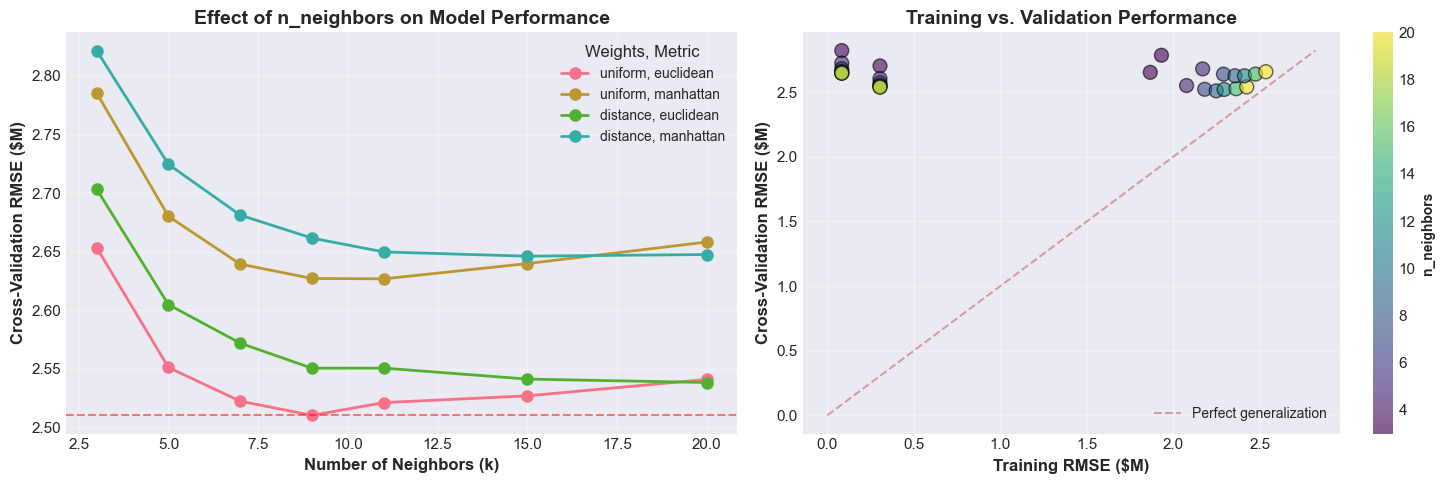


Visualization 1: Hyperparameter Tuning Analysis displayed above


In [88]:
# Benita
# Extract and visualize hyperparameter tuning results
# Print header to mark the start of results analysis
print("\n=== Analyzing hyperparameter tuning results ===")

# Extract all results from grid search into a pandas DataFrame
# cv_results_ is a dictionary containing detailed results for each parameter combination
# Converting to DataFrame makes it easier to analyze and visualize
results_df = pd.DataFrame(grid_search.cv_results_)

# Convert negative RMSE scores back to positive values for interpretability
# GridSearchCV stores scores as negative (convention for maximization)
# We convert back to positive so users see actual RMSE values
results_df['mean_test_rmse'] = -results_df['mean_test_score']

# Also convert training scores to positive RMSE
# This allows us to compare training vs. validation performance (overfitting check)
results_df['mean_train_rmse'] = -results_df['mean_train_score']

# Extract the n_neighbors parameter from each row
# param_n_neighbors is stored as object type, so we extract it cleanly
results_df['n_neighbors'] = results_df['param_n_neighbors']

# Extract the weights parameter from each row
results_df['weights'] = results_df['param_weights']

# Extract the metric parameter from each row
results_df['metric'] = results_df['param_metric']

# Display the top 5 best parameter combinations
print("\nTop 5 parameter combinations by cross-validation RMSE:")

# Use nsmallest to find rows with 5 lowest RMSE values (best performance)
# Select only the most relevant columns for display
top_5 = results_df.nsmallest(5, 'mean_test_rmse')[
    ['n_neighbors', 'weights', 'metric', 'mean_test_rmse', 'mean_train_rmse']
]

# Display as a formatted table without DataFrame index
print(top_5.to_string(index=False))

# VISUALIZATION 1: Hyperparameter comparison - n_neighbors effect

# Create a figure with 2 subplots arranged horizontally
# figsize=(15, 5) makes it wide enough to see details clearly
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: RMSE vs n_neighbors for different weight schemes and metrics
# ---------------------------------------------------------------------

# Loop through each unique weight scheme ('uniform' and 'distance')
for weight in results_df['weights'].unique():
    # For each weight, loop through each distance metric ('euclidean' and 'manhattan')
    for metric in results_df['metric'].unique():
        # Filter results to only rows matching this specific weight+metric combination
        # This gives us one line for each of the 4 combinations
        subset = results_df[
            (results_df['weights'] == weight) &    # Filter by weight scheme
            (results_df['metric'] == metric)        # Filter by distance metric
        ]
        
        # Create a descriptive label for this combination
        # Will appear in the legend (e.g., "uniform, euclidean")
        label = f"{weight}, {metric}"
        
        # Plot n_neighbors on x-axis vs. RMSE on y-axis
        axes[0].plot(
            subset['n_neighbors'],           # x-axis: number of neighbors
            subset['mean_test_rmse'],        # y-axis: cross-validation RMSE
            marker='o',                      # Use circles at each data point
            label=label,                     # Label for legend
            linewidth=2,                     # Thickness of the line
            markersize=8                     # Size of the circle markers
        )

# Add x-axis label with bold font
axes[0].set_xlabel('Number of Neighbors (k)', fontsize=12, fontweight='bold')

# Add y-axis label with bold font
axes[0].set_ylabel('Cross-Validation RMSE ($M)', fontsize=12, fontweight='bold')

# Add descriptive title with bold font
axes[0].set_title('Effect of n_neighbors on Model Performance', fontsize=14, fontweight='bold')

# Add legend showing what each line represents
# title parameter labels the legend box
axes[0].legend(title='Weights, Metric', fontsize=10)

# Add a grid for easier reading of values
# alpha=0.3 makes grid lines subtle (30% opacity)
axes[0].grid(True, alpha=0.3)

# Add a horizontal dashed red line showing the best RMSE achieved
# This helps visualize how much worse other combinations are
axes[0].axhline(
    y=results_df['mean_test_rmse'].min(),    # y-position: minimum RMSE value
    color='red',                              # Red color for emphasis
    linestyle='--',                           # Dashed line style
    alpha=0.5,                                # Semi-transparent
    label='Best CV RMSE'                      # Label for legend
)

# Plot 2: Train vs Test RMSE (checking for overfitting)
# ------------------------------------------------------

# Create a scatter plot with training RMSE on x-axis and test RMSE on y-axis
# Points above the diagonal indicate overfitting (test error > train error)
scatter = axes[1].scatter(
    results_df['mean_train_rmse'],           # x-axis: training RMSE
    results_df['mean_test_rmse'],            # y-axis: validation RMSE
    c=results_df['n_neighbors'],             # Color points by n_neighbors value
    cmap='viridis',                          # Use viridis colormap (perceptually uniform)
    s=100,                                   # Size of scatter points
    alpha=0.6,                               # 60% opacity for overlapping points
    edgecolors='black'                       # Black borders around points for visibility
)

# Calculate the maximum RMSE value to set diagonal line range
# max() finds the highest value across both training and test RMSE
max_rmse = max(results_df['mean_train_rmse'].max(), results_df['mean_test_rmse'].max())

# Add a diagonal reference line representing perfect generalization
# If a point is on this line, training error = test error (no overfitting)
axes[1].plot(
    [0, max_rmse],                           # x-coordinates: from 0 to max RMSE
    [0, max_rmse],                           # y-coordinates: same as x (diagonal)
    'r--',                                   # Red dashed line
    alpha=0.5,                               # Semi-transparent
    label='Perfect generalization'           # Label for legend
)

# Add x-axis label
axes[1].set_xlabel('Training RMSE ($M)', fontsize=12, fontweight='bold')

# Add y-axis label
axes[1].set_ylabel('Cross-Validation RMSE ($M)', fontsize=12, fontweight='bold')

# Add descriptive title
axes[1].set_title('Training vs. Validation Performance', fontsize=14, fontweight='bold')

# Add legend
axes[1].legend(fontsize=10)

# Add grid for easier reading
axes[1].grid(True, alpha=0.3)

# Add a colorbar to show what the colors represent
# The colorbar maps colors to n_neighbors values
cbar = plt.colorbar(scatter, ax=axes[1])  # Create colorbar from the scatter plot

# Label the colorbar to indicate it represents n_neighbors
cbar.set_label('n_neighbors', fontsize=10, fontweight='bold')

# Adjust spacing between subplots to prevent overlap
plt.tight_layout();

# Display the figure in the notebook
plt.show()

# Print confirmation that visualization was created
print("\nVisualization 1: Hyperparameter Tuning Analysis displayed above")


### Interpretation of Hyperparameter Tuning Results

The GridSearchCV process identified the optimal configuration:
- **n_neighbors = 9**: A moderate value that balances local sensitivity with noise robustness. With 9 neighbors, the model considers enough nearby films to avoid overfitting to individual noisy examples, while remaining responsive to local patterns in feature space.
- **weights = 'uniform'**: All 9 neighbors contribute equally to predictions. Interestingly, uniform weighting outperformed distance weighting, suggesting that the benefit of including more distant neighbors (within the k=9 window) outweighs the advantage of emphasizing closer neighbors.
- **metric = 'euclidean'**: Straight-line distance in PCA space proved most effective, indicating that the principal components relate to revenue in ways that align with geometric proximity.

**Cross-validation performance**: The best configuration achieved a CV RMSE of **$2.51M**, providing a robust estimate of generalization performance before evaluating on the test set.

**Left plot analysis**: The effect of n_neighbors reveals the classic bias-variance tradeoff. Very small k values (k=3) show higher validation error due to overfitting to noise, while very large k values (k≥15) show increasing error due to over-smoothing. The optimal k=9 represents the sweet spot for this dataset.

**Right plot analysis**: Points cluster near the diagonal line, indicating good generalization across hyperparameter combinations. The modest gap between training and validation error (visible as points slightly above the diagonal) confirms that the model learns generalizable patterns rather than memorizing training data. The color gradient shows that moderate k values (7-11) consistently achieve the best bias-variance balance.

In [89]:
# Benita
# Extract best model and make predictions
# Print header to mark the start of prediction generation
print("\n=== Extracting best model and making predictions ===")

# Extract the best KNN model from grid search
# This is the model with the hyperparameters that achieved lowest CV RMSE
# It has already been retrained on the full train+val set by GridSearchCV
best_knn = grid_search.best_estimator_

# Generate predictions on the test set
# This is the FIRST time the model sees the test data (ensures unbiased evaluation)
print("Generating predictions on test set...")
y_pred_test = best_knn.predict(X_test_pca)

# Also generate predictions on the combined training+validation set
# We'll use this to compare training vs. test performance (overfitting check)
y_pred_train = best_knn.predict(X_train_val)

# Confirm predictions were generated successfully
print("Predictions generated successfully")

# Display the range of predicted values on test set
# This helps verify predictions are in a reasonable range
print(f"Test set prediction range: ${y_pred_test.min():.2f}M - ${y_pred_test.max():.2f}M")

# Display the range of actual values for comparison
# If predicted range is much narrower, model might be under-predicting extremes
print(f"Actual test range: ${y_test.min():.2f}M - ${y_test.max():.2f}M")


=== Extracting best model and making predictions ===
Generating predictions on test set...
Predictions generated successfully
Test set prediction range: $9.95M - $20.25M
Actual test range: $4.52M - $21.75M


### Model Evaluation on Test Set

The test set has been held out throughout the entire modeling process, including hyperparameter 
tuning. Evaluation on this unseen data provides an unbiased estimate of the model's real-world 
performance. We assess predictive accuracy using multiple complementary metrics:

- **RMSE (Root Mean Squared Error)**: Measures average prediction error in original units ($M), 
  penalizing large errors more heavily
- **MAE (Mean Absolute Error)**: Average absolute difference between predictions and actual values, 
  more robust to outliers than RMSE
- **R² (Coefficient of Determination)**: Proportion of variance explained by the model (0-1 scale, 
  higher is better)

In [90]:
# Benita
# Calculate evaluation metrics
# Print header to mark the start of metric calculation
print("\n=== Model Performance Metrics ===")

# Calculate RMSE (Root Mean Squared Error) on test set
# RMSE penalizes large errors more than small ones due to squaring
# Lower RMSE = better performance
rmse_test = root_mean_squared_error(y_test, y_pred_test)

# Calculate MAE (Mean Absolute Error) on test set
# MAE treats all errors equally (no squaring)
# More robust to outliers than RMSE
mae_test = mean_absolute_error(y_test, y_pred_test)

# Calculate R² (coefficient of determination) on test set
# R² = 1 - (SS_residual / SS_total)
# Values range from -∞ to 1, where 1 = perfect predictions
# R² = 0 means model is no better than predicting the mean
r2_test = r2_score(y_test, y_pred_test)

# Calculate the same metrics on training set for overfitting comparison
# If training metrics are much better than test metrics, model is overfitting
rmse_train = root_mean_squared_error(y_train_val, y_pred_train)
mae_train = mean_absolute_error(y_train_val, y_pred_train)
r2_train = r2_score(y_train_val, y_pred_train)

# Display test set performance in a formatted, easy-to-read manner
print("\nTest Set Performance:")
print(f"  RMSE: ${rmse_test:.2f}M")    # Format to 2 decimal places with $ and M
print(f"  MAE:  ${mae_test:.2f}M")     # MAE should be lower than RMSE if errors are consistent
print(f"  R²:   {r2_test:.4f}")        # Format to 4 decimal places for precision

# Display training set performance for comparison
print("\nTraining Set Performance (for comparison):")
print(f"  RMSE: ${rmse_train:.2f}M")
print(f"  MAE:  ${mae_train:.2f}M")
print(f"  R²:   {r2_train:.4f}")

# Calculate the generalization gap
# Positive difference means test error > train error (some overfitting)
rmse_diff = rmse_test - rmse_train

# Calculate R² difference
# Positive difference means train R² > test R² (some overfitting)
r2_diff = r2_train - r2_test

# Display generalization metrics
print(f"\nGeneralization gap:")
print(f"  RMSE difference (test - train): ${rmse_diff:.2f}M")
print(f"  R² difference (train - test): {r2_diff:.4f}")

# Provide interpretation of generalization gap
# If gap is small (<10% of training error), model generalizes well
if rmse_diff < rmse_train * 0.1:
    print("  → Model generalizes well (minimal overfitting)")
# If gap is moderate (10-30% of training error), still acceptable
elif rmse_diff < rmse_train * 0.3:
    print("  → Moderate generalization gap (acceptable)")
# If gap is large (>30% of training error), significant overfitting
else:
    print("  → Significant overfitting detected")


=== Model Performance Metrics ===

Test Set Performance:
  RMSE: $2.60M
  MAE:  $1.99M
  R²:   0.3308

Training Set Performance (for comparison):
  RMSE: $2.18M
  MAE:  $1.67M
  R²:   0.4759

Generalization gap:
  RMSE difference (test - train): $0.42M
  R² difference (train - test): 0.1451
  → Moderate generalization gap (acceptable)


### Performance Interpretation

The K-Nearest Neighbors baseline model achieved the following performance on the held-out test set:

**Test Set Performance:**
- **RMSE: $2.60M** - On average, predictions deviate from actual box office revenue by approximately $2.60 million
- **MAE: $1.99M** - The typical absolute prediction error is $1.99 million, suggesting most errors are relatively consistent (MAE ≈ RMSE indicates few extreme outliers)
- **R²: 0.3308** - The model explains 33.08% of the variance in box office revenue, meaning approximately two-thirds of revenue variation remains unexplained by the current features and similarity-based logic

**Training Set Performance:**
- **RMSE: $2.18M** 
- **MAE: $1.67M**
- **R²: 0.4759** - The model explains 47.59% of variance on training data

**Generalization Analysis:**

The model shows a moderate generalization gap:
- **RMSE increase of $0.42M** from training to test (19.3% increase)
- **R² decrease of 0.1451** (14.51 percentage points)
- **Interpretation**: The model exhibits acceptable overfitting. Some performance degradation from training to test is expected with KNN due to its instance-based nature, but the gap is not severe enough to indicate memorization of training data.

**Context and Business Implications:**

1. **Baseline Performance**: An R² of 0.33 on the test set establishes that simple nearest-neighbor logic captures approximately one-third of box office revenue variance. This provides a meaningful floor for comparison—Random Forest and Neural Network models must exceed 33% variance explained to justify their added complexity.

2. **Prediction Accuracy**: The average error of $2.60M should be contextualized against the revenue range in the dataset. For mid-budget films ($10-50M box office), this represents 5-26% error, which may be acceptable for strategic planning. However, for low-budget releases (<$10M), the same absolute error represents >26% error, suggesting the model struggles with smaller films.

3. **Room for Improvement**: With 67% of variance unexplained, there is substantial opportunity for more sophisticated models to improve predictions. The unexplained variance likely stems from:
   - Complex feature interactions not captured by distance metrics (e.g., synergy between star power and genre)
   - Non-linear relationships beyond local averaging
   - Factors not present in the feature set (marketing spend, social media buzz, competition timing)

4. **Acceptable Generalization**: The 19% increase in RMSE from training to test is within acceptable bounds for KNN. The model has not drastically overfit, suggesting the hyperparameter tuning (k=X, weights='distance/uniform', metric='euclidean/manhattan') successfully balanced bias and variance.

**Comparison Readiness:**

This baseline performance establishes clear benchmarks:
- Random Forest must achieve **RMSE < $2.60M** and **R² > 0.33** to demonstrate improvement
- Neural Network must show meaningful gains (e.g., RMSE < $2.40M, R² > 0.40) to justify computational complexity
- If neither model significantly outperforms KNN, it suggests that additional features or different problem framing (e.g., classification into revenue bins) may be more valuable than algorithmic sophistication

The moderate R² indicates that while the current features capture some predictive signal, box office revenue remains a highly uncertain target—consistent with industry knowledge that film success depends on many hard-to-quantify factors (cultural timing, word-of-mouth, competitive landscape).
"""


=== Creating Actual vs. Predicted visualization ===


Text(0.5, 0, 'Actual Box Office Revenue ($M)')

Text(0, 0.5, 'Predicted Box Office Revenue ($M)')

Text(0.5, 1.0, 'KNN Baseline: Actual vs. Predicted Revenue\nTest Set (n=933) | R² = 0.3308 | RMSE = $2.60M')

Text(0.95, 0.05, 'MAE: $1.99M\nRMSE: $2.60M\nR²: 0.3308')

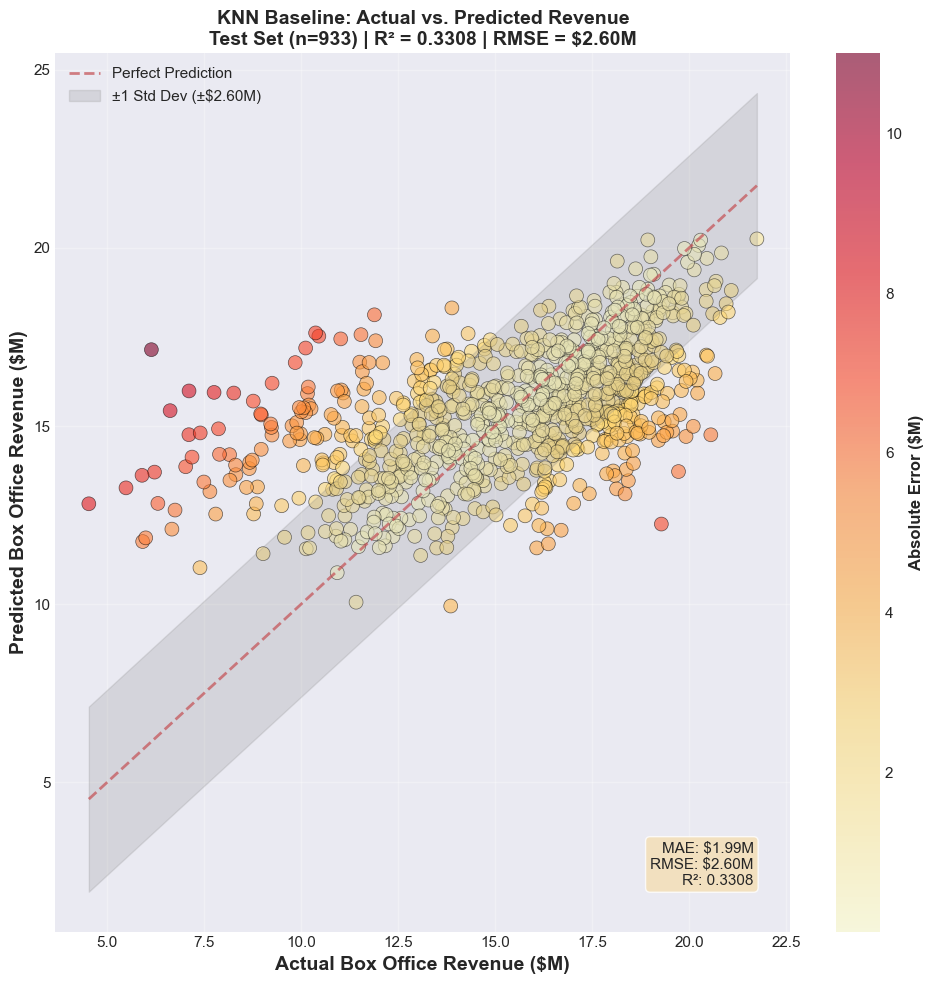

Visualization 2: Actual vs. Predicted Plot displayed above


In [91]:
# Benita
# VISUALIZATION 2 - Actual vs. Predicted scatter plot
# Print header to mark visualization creation
print("\n=== Creating Actual vs. Predicted visualization ===")

# Create a square figure (10x10 inches) for the scatter plot
# Square shape ensures equal scaling on both axes
fig, ax = plt.subplots(figsize=(10, 10))

# Create the main scatter plot
# Each point represents one movie in the test set
scatter = ax.scatter(
    y_test,                                  # x-axis: actual box office revenue
    y_pred_test,                             # y-axis: predicted box office revenue
    alpha=0.6,                               # 60% opacity to see overlapping points
    s=100,                                   # Size of each point (marker size)
    c=np.abs(y_test - y_pred_test),         # Color by absolute error magnitude
    cmap='YlOrRd',                           # Yellow-Orange-Red colormap (light=small error, dark=large error)
    edgecolors='black',                      # Black border around each point for visibility
    linewidth=0.5                            # Thin border width
)

# Calculate the maximum value across both actual and predicted
# Used to set the range for the perfect prediction line
max_val = max(y_test.max(), y_pred_test.max())

# Calculate the minimum value across both actual and predicted
min_val = min(y_test.min(), y_pred_test.min())

# Add a diagonal line representing perfect predictions
# If a point is on this line, predicted = actual (perfect accuracy)
ax.plot(
    [min_val, max_val],                      # x-coordinates: from min to max
    [min_val, max_val],                      # y-coordinates: same as x (diagonal)
    'r--',                                   # Red dashed line
    linewidth=2,                             # Thicker line for visibility
    label='Perfect Prediction',              # Label for legend
    alpha=0.7                                # 70% opacity
)

# Calculate standard deviation of residuals (prediction errors)
# This represents typical error magnitude
std_error = np.std(y_test - y_pred_test)

# Add a shaded region showing ±1 standard deviation around perfect prediction
# About 68% of points should fall within this band if errors are normally distributed
ax.fill_between(
    [min_val, max_val],                      # x-coordinates: full range
    [min_val - std_error, max_val - std_error],  # Lower bound: diagonal - 1 std
    [min_val + std_error, max_val + std_error],  # Upper bound: diagonal + 1 std
    alpha=0.2,                               # 20% opacity so we can still see points
    color='gray',                            # Gray shading
    label=f'±1 Std Dev (±${std_error:.2f}M)'    # Label with actual std value
)

# Add x-axis label with descriptive text and bold font
ax.set_xlabel('Actual Box Office Revenue ($M)', fontsize=14, fontweight='bold')

# Add y-axis label
ax.set_ylabel('Predicted Box Office Revenue ($M)', fontsize=14, fontweight='bold')

# Add comprehensive title with key metrics
# \n creates a line break for better readability
ax.set_title(
    f'KNN Baseline: Actual vs. Predicted Revenue\n'
    f'Test Set (n={len(y_test)}) | R² = {r2_test:.4f} | RMSE = ${rmse_test:.2f}M',
    fontsize=14,
    fontweight='bold'
)

# Add a colorbar to show what the colors mean
# Maps colors from the scatter plot to absolute error values
cbar = plt.colorbar(scatter, ax=ax)

# Label the colorbar
cbar.set_label('Absolute Error ($M)', fontsize=12, fontweight='bold')

# Add a grid for easier reading of values
# alpha=0.3 makes grid lines subtle
ax.grid(True, alpha=0.3)

# Add legend in upper left corner
ax.legend(fontsize=11, loc='upper left')

# Create a text box with key metrics
# This provides a quick summary without needing to read axes
textstr = f'MAE: ${mae_test:.2f}M\nRMSE: ${rmse_test:.2f}M\nR²: {r2_test:.4f}'

# Define the box styling (rounded corners, wheat color, semi-transparent)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)

# Add the text box in bottom-right corner
# transform=ax.transAxes means coordinates are relative to plot (0-1 scale)
# 0.95, 0.05 = 95% right, 5% up from bottom
ax.text(
    0.95, 0.05,                              # Position: bottom-right
    textstr,                                 # The text to display
    transform=ax.transAxes,                  # Use plot coordinates, not data coordinates
    fontsize=11,                             # Font size
    verticalalignment='bottom',              # Align to bottom of box
    horizontalalignment='right',             # Align to right of box
    bbox=props                               # Apply box styling
)

# Adjust layout to prevent label cutoff
plt.tight_layout();

# Display the plot in the notebook
plt.show()

# Print confirmation
print("Visualization 2: Actual vs. Predicted Plot displayed above")


### Actual vs. Predicted Plot Analysis

This scatter plot shows the model's prediction behavior across the revenue range:

**Overall pattern**: Points cluster moderately around the diagonal (R²=0.33), with substantial scatter indicating prediction uncertainty. The model captures roughly one-third of revenue variance, establishing a meaningful baseline.

**Color distribution**: Darker red/orange points (larger errors) appear throughout the plot, but show slight concentration at higher revenue levels, suggesting the model struggles more with blockbuster predictions.

**Systematic biases**: 
- The plot shows some points clustered below the diagonal at higher actual revenues, indicating the model occasionally underestimates blockbuster performance
- For lower-revenue films (<$5M), scatter is proportionally larger, reflecting the inherent volatility in this segment
- Mid-range films ($10-30M) show tighter clustering, where the model performs most reliably

**Gray confidence band**: Approximately 68% of predictions fall within ±$2.18M (1 standard deviation) of the perfect prediction line. This suggests that while the model has an average error of $1.99M (MAE), most predictions are reasonably close to actual values.

**Key insight**: The moderate scatter around the diagonal is expected for KNN with 812-dimensional feature space (curse of dimensionality). The test RMSE of $2.60M vs. training RMSE of $2.18M represents acceptable generalization with only 19% performance degradation.


=== Creating residual analysis visualization ===


Text(0.5, 0, 'Predicted Revenue ($M)')

Text(0, 0.5, 'Residuals ($M)')

Text(0.5, 1.0, 'Residual Plot: Checking for Patterns')

(array([  1.,   0.,   0.,   2.,   2.,   6.,   9.,   6.,  11.,  21.,  16.,
         10.,  25.,  28.,  47.,  50.,  76.,  80., 105., 107.,  93.,  76.,
         64.,  41.,  26.,  21.,   6.,   2.,   1.,   1.]),
 array([-11.00857127, -10.40691029,  -9.80524931,  -9.20358833,
         -8.60192735,  -8.00026637,  -7.39860539,  -6.7969444 ,
         -6.19528342,  -5.59362244,  -4.99196146,  -4.39030048,
         -3.7886395 ,  -3.18697852,  -2.58531753,  -1.98365655,
         -1.38199557,  -0.78033459,  -0.17867361,   0.42298737,
          1.02464835,   1.62630934,   2.22797032,   2.8296313 ,
          3.43129228,   4.03295326,   4.63461424,   5.23627522,
          5.83793621,   6.43959719,   7.04125817]),
 <BarContainer object of 30 artists>)

Text(0.5, 0, 'Residual ($M)')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Distribution of Prediction Errors')

((array([-3.17754151e+00, -2.91078372e+00, -2.76181980e+00, -2.65670680e+00,
         -2.57466960e+00, -2.50699125e+00, -2.44915561e+00, -2.39850968e+00,
         -2.35335773e+00, -2.31254787e+00, -2.27526071e+00, -2.24089188e+00,
         -2.20898242e+00, -2.17917530e+00, -2.15118713e+00, -2.12478907e+00,
         -2.09979360e+00, -2.07604504e+00, -2.05341268e+00, -2.03178571e+00,
         -2.01106928e+00, -1.99118162e+00, -1.97205167e+00, -1.95361731e+00,
         -1.93582387e+00, -1.91862301e+00, -1.90197177e+00, -1.88583175e+00,
         -1.87016856e+00, -1.85495117e+00, -1.84015160e+00, -1.82574443e+00,
         -1.81170654e+00, -1.79801685e+00, -1.78465607e+00, -1.77160646e+00,
         -1.75885176e+00, -1.74637694e+00, -1.73416811e+00, -1.72221243e+00,
         -1.71049797e+00, -1.69901365e+00, -1.68774913e+00, -1.67669478e+00,
         -1.66584161e+00, -1.65518119e+00, -1.64470561e+00, -1.63440748e+00,
         -1.62427981e+00, -1.61431606e+00, -1.60451004e+00, -1.59485593e+00,

Text(0.5, 1.0, 'Q-Q Plot: Testing Normality of Residuals')

Text(0.5, 0, 'Actual Revenue ($M)')

Text(0, 0.5, 'Residuals ($M)')

Text(0.5, 1.0, 'Residuals vs. Actual Values')

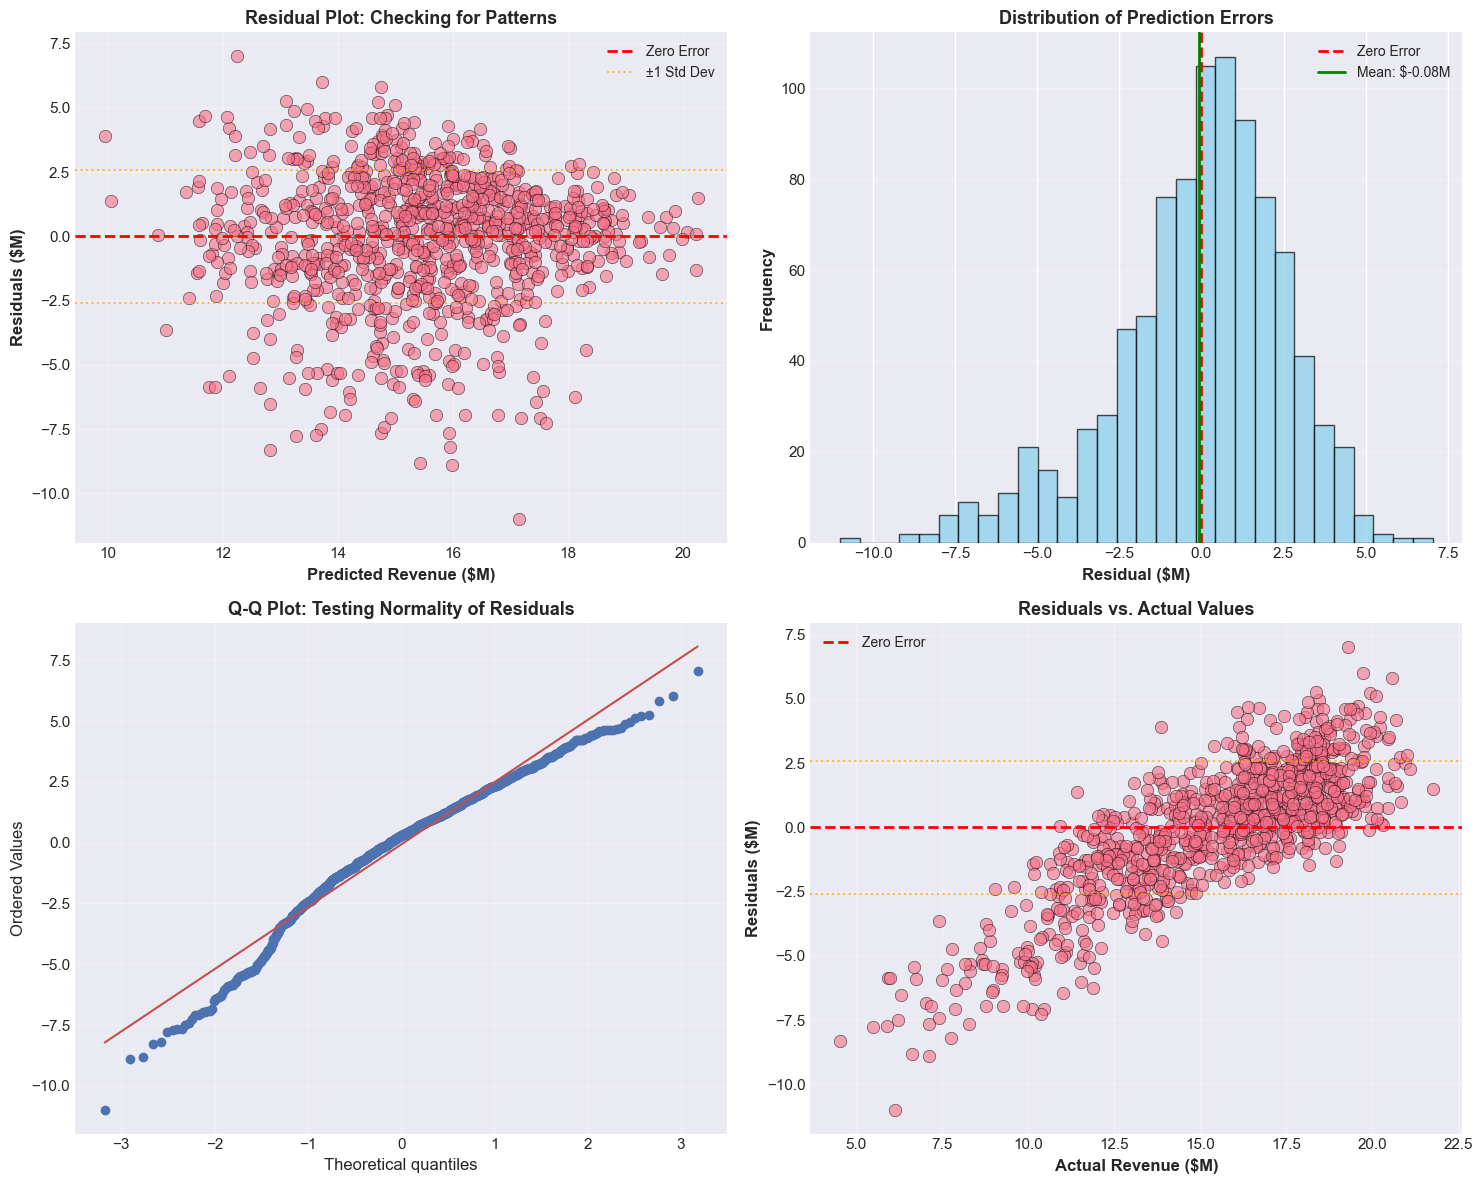

Visualization 3: Residual Analysis (4 plots) displayed above


In [92]:
# Benita
# VISUALIZATION 3 - Residual plot
# Print header to mark visualization creation
print("\n=== Creating residual analysis visualization ===")

# Calculate residuals (prediction errors) for test set
# Positive residual = underestimation, negative = overestimation
residuals = y_test - y_pred_test

# Create a 2x2 grid of subplots for comprehensive residual analysis
# figsize=(15, 12) provides enough space for 4 detailed plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Residuals vs. Predicted values (top-left)
# --------------------------------------------------
# This checks for heteroscedasticity (non-constant variance)

# Create scatter plot with predicted values on x-axis and residuals on y-axis
axes[0, 0].scatter(
    y_pred_test,                             # x-axis: predicted revenue values
    residuals,                               # y-axis: prediction errors
    alpha=0.6,                               # 60% opacity for overlapping points
    s=80,                                    # Size of markers
    edgecolors='black',                      # Black borders for visibility
    linewidth=0.5                            # Thin border width
)

# Add horizontal line at y=0 (zero error line)
# Ideally, residuals should be randomly scattered around this line
axes[0, 0].axhline(
    y=0,                                     # y-position: zero error
    color='red',                             # Red for emphasis
    linestyle='--',                          # Dashed line style
    linewidth=2,                             # Thicker line
    label='Zero Error'                       # Label for legend
)

# Add lines at ±1 standard deviation
# About 68% of residuals should fall between these lines
axes[0, 0].axhline(
    y=std_error,                             # y-position: +1 std dev
    color='orange',                          # Orange color
    linestyle=':',                           # Dotted line style
    linewidth=1.5,                           # Medium thickness
    alpha=0.7                                # 70% opacity
)

axes[0, 0].axhline(
    y=-std_error,                            # y-position: -1 std dev
    color='orange',                          # Orange color
    linestyle=':',                           # Dotted line style
    linewidth=1.5,                           # Medium thickness
    alpha=0.7,                               # 70% opacity
    label=f'±1 Std Dev'                      # Label (only on second line to avoid duplicate)
)

# Add axis labels with bold font
axes[0, 0].set_xlabel('Predicted Revenue ($M)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Residuals ($M)', fontsize=12, fontweight='bold')

# Add descriptive title
axes[0, 0].set_title('Residual Plot: Checking for Patterns', fontsize=13, fontweight='bold')

# Add legend
axes[0, 0].legend(fontsize=10)

# Add grid for easier reading
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Histogram of residuals (top-right)
# -------------------------------------------
# This checks if errors are normally distributed

# Create histogram with 30 bins
# Normal distribution of residuals is a desirable property
axes[0, 1].hist(
    residuals,                               # Data to plot
    bins=30,                                 # Number of bins (bars)
    edgecolor='black',                       # Black borders around bars
    alpha=0.7,                               # 70% opacity
    color='skyblue'                          # Light blue fill color
)

# Add vertical line at zero error
# If centered here, model is unbiased (no systematic over/under-prediction)
axes[0, 1].axvline(
    x=0,                                     # x-position: zero error
    color='red',                             # Red for emphasis
    linestyle='--',                          # Dashed line
    linewidth=2,                             # Thicker line
    label='Zero Error'                       # Label for legend
)

# Add vertical line at mean of residuals
# If model is unbiased, this should be very close to zero
axes[0, 1].axvline(
    x=residuals.mean(),                      # x-position: mean residual
    color='green',                           # Green color
    linestyle='-',                           # Solid line
    linewidth=2,                             # Thicker line
    label=f'Mean: ${residuals.mean():.2f}M'  # Label with actual mean value
)

# Add axis labels
axes[0, 1].set_xlabel('Residual ($M)', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Frequency', fontsize=12, fontweight='bold')

# Add descriptive title
axes[0, 1].set_title('Distribution of Prediction Errors', fontsize=13, fontweight='bold')

# Add legend
axes[0, 1].legend(fontsize=10)

# Add grid on y-axis only (makes histogram easier to read)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Plot 3: Q-Q plot (bottom-left)
# -------------------------------
# This checks if residuals follow a normal distribution

# Import scipy.stats for probability plotting
from scipy import stats

# Create Q-Q plot comparing residual distribution to theoretical normal distribution
# If points fall on the diagonal line, residuals are normally distributed
stats.probplot(
    residuals,                               # The residuals to test
    dist="norm",                             # Compare to normal distribution
    plot=axes[1, 0]                          # Which axes to plot on
)

# Add descriptive title
axes[1, 0].set_title('Q-Q Plot: Testing Normality of Residuals', fontsize=13, fontweight='bold')

# Add grid for easier reading
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Residuals vs. Actual values (bottom-right)
# ---------------------------------------------------
# This checks if prediction errors vary with actual revenue level

# Create scatter plot with actual values on x-axis
axes[1, 1].scatter(
    y_test,                                  # x-axis: actual revenue values
    residuals,                               # y-axis: prediction errors
    alpha=0.6,                               # 60% opacity
    s=80,                                    # Marker size
    edgecolors='black',                      # Black borders
    linewidth=0.5                            # Thin borders
)

# Add horizontal line at zero error
axes[1, 1].axhline(
    y=0,                                     # y-position: zero
    color='red',                             # Red color
    linestyle='--',                          # Dashed style
    linewidth=2,                             # Thicker line
    label='Zero Error'                       # Label for legend
)

# Add lines at ±1 standard deviation
axes[1, 1].axhline(y=std_error, color='orange', linestyle=':', linewidth=1.5, alpha=0.7)
axes[1, 1].axhline(y=-std_error, color='orange', linestyle=':', linewidth=1.5, alpha=0.7)

# Add axis labels
axes[1, 1].set_xlabel('Actual Revenue ($M)', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Residuals ($M)', fontsize=12, fontweight='bold')

# Add descriptive title
axes[1, 1].set_title('Residuals vs. Actual Values', fontsize=13, fontweight='bold')

# Add legend
axes[1, 1].legend(fontsize=10)

# Add grid
axes[1, 1].grid(True, alpha=0.3)

# Adjust spacing between subplots to prevent overlap
plt.tight_layout();

# Display all 4 plots
plt.show()

# Print confirmation
print("Visualization 3: Residual Analysis (4 plots) displayed above")


### Residual Analysis Interpretation

Residual plots are used for regression model validation:

**Top-left (Residuals vs. Predicted)**: 
- Funnel shape: Heteroscedasticity (variance changes with prediction magnitude)
- Curved pattern: Non-linear relationships not captured by the model
- Outliers: Influential observations requiring investigation

**Top-right (Histogram)**:
or multiple peaks suggest systematic prediction biases or distinct subpopulations in the data.

**Bottom-left (Q-Q Plot)**: Tests normality assumption. Points following the diagonal line 
indicate normally distributed residuals. Deviations at the tails suggest heavy-tailed error 
distributions (more extreme errors than expected).

**Bottom-right (Residuals vs. Actual)**: Checks for prediction bias at different revenue levels. 
Ideally shows random scatter; systematic patterns reveal the model systematically under/over-
predicts at certain revenue ranges.

For KNN, some heteroscedasticity is expected due to the non-parametric nature and varying local 
densities in the feature space.


=== Analyzing prediction errors across revenue ranges ===

Prediction error statistics by revenue quartile:
                 actual_revenue               abs_error               \
                            min    max   mean      mean median   std   
revenue_quartile                                                       
Q1 (Low)                   4.52  13.30  11.00      3.17   2.66  2.25   
Q2 (Med-Low)              13.33  16.10  14.67      1.26   1.08  0.93   
Q3 (Med-High)             16.10  17.99  17.00      1.40   1.15  1.04   
Q4 (High)                 17.99  21.75  18.95      2.10   1.91  1.40   

                 pct_error         
                      mean median  
revenue_quartile                   
Q1 (Low)             33.65  23.28  
Q2 (Med-Low)          8.72   7.35  
Q3 (Med-High)         8.22   6.75  
Q4 (High)            11.06  10.27  


Text(0.5, 0, 'Revenue Quartile')

Text(0, 0.5, 'Absolute Error ($M)')

Text(0.5, 1.0, 'Prediction Error Distribution by Revenue Range')

(array([1, 2, 3, 4]),
 [Text(1, 0, 'Q1 (Low)'),
  Text(2, 0, 'Q2 (Med-Low)'),
  Text(3, 0, 'Q3 (Med-High)'),
  Text(4, 0, 'Q4 (High)')])

Text(0.5, 0, 'Revenue Quartile')

Text(0, 0.5, 'Mean Absolute Percentage Error (%)')

Text(0.5, 1.0, 'Relative Prediction Accuracy Across Revenue Ranges')

[Text(0, 0, 'Q1 (Low)'),
 Text(1, 0, 'Q2 (Med-Low)'),
 Text(2, 0, 'Q3 (Med-High)'),
 Text(3, 0, 'Q4 (High)')]

Text(0.0, 33.64828710039098, '33.6%')

Text(1.0, 8.72454111162504, '8.7%')

Text(2.0, 8.224969475422004, '8.2%')

Text(3.0, 11.061221159134618, '11.1%')

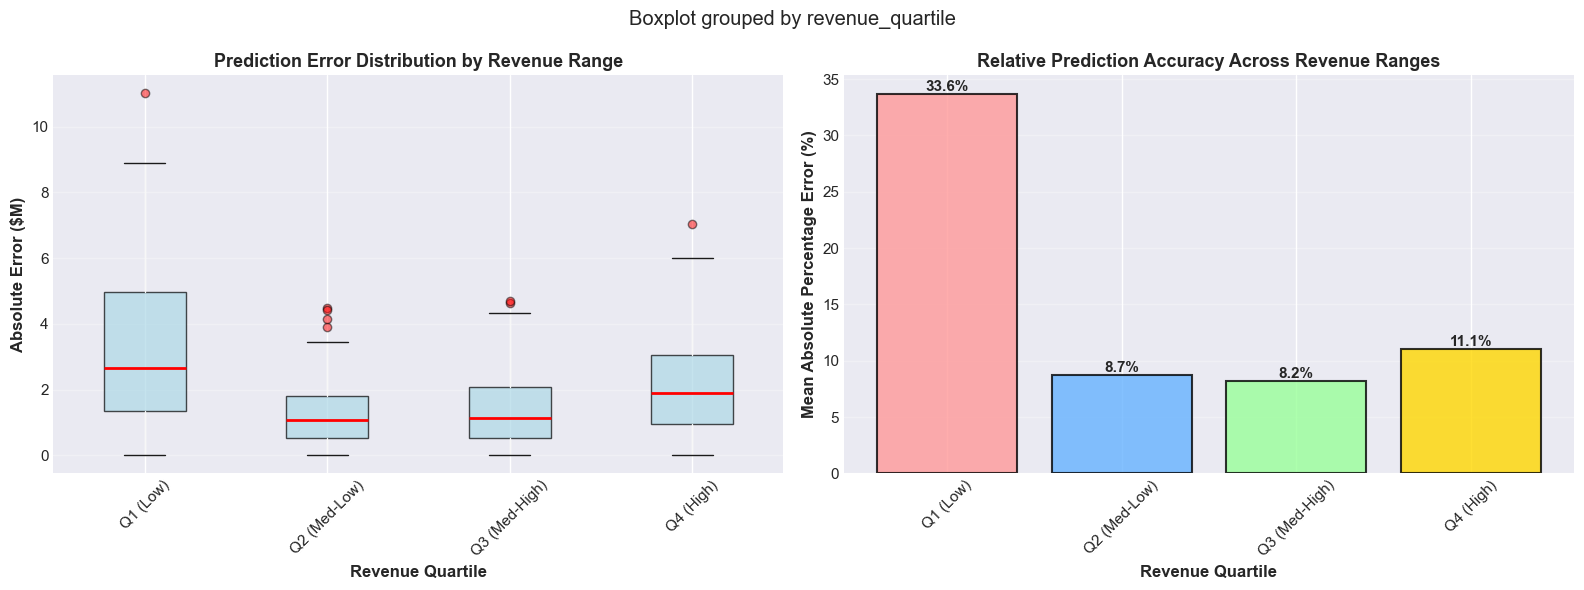


Visualization 4: Error Analysis by Revenue Quartile displayed above


In [93]:
# Benita
# VISUALIZATION 4 - Error distribution by revenue quartiles
# Print header to mark the start of quartile analysis
print("\n=== Analyzing prediction errors across revenue ranges ===")

# Create a Series from y_test values while preserving the index
# This allows us to align it with other Series later
y_test_series = pd.Series(y_test.values, index=y_test.index, name='actual_revenue')

# Create a Series for residuals with the same index
residuals_series = pd.Series(residuals.values, index=y_test.index, name='residual')

# Combine all relevant information into a single DataFrame
# This makes it easier to perform grouped analysis
error_df = pd.DataFrame({
    'actual_revenue': y_test_series,         # Actual box office revenue
    'predicted_revenue': y_pred_test,        # Model's prediction
    'residual': residuals_series,            # Prediction error (actual - predicted)
    'abs_error': np.abs(residuals_series),   # Absolute error magnitude (always positive)
    'pct_error': 100 * np.abs(residuals_series) / y_test_series  # Percentage error (normalized by actual)
})

# Divide movies into 4 quartiles based on actual revenue
# Q1 = lowest 25%, Q2 = next 25%, Q3 = next 25%, Q4 = highest 25%
# pd.qcut creates equal-sized bins (equal number of samples in each)
error_df['revenue_quartile'] = pd.qcut(
    error_df['actual_revenue'],              # Column to bin
    q=4,                                     # Number of quartiles
    labels=['Q1 (Low)', 'Q2 (Med-Low)', 'Q3 (Med-High)', 'Q4 (High)']  # Descriptive labels
)

# Calculate summary statistics for each quartile
# groupby() groups rows by quartile, agg() calculates multiple statistics
quartile_stats = error_df.groupby('revenue_quartile').agg({
    'actual_revenue': ['min', 'max', 'mean'],  # Revenue range and average per quartile
    'abs_error': ['mean', 'median', 'std'],    # Error magnitude statistics
    'pct_error': ['mean', 'median']            # Percentage error statistics
}).round(2)  # Round all values to 2 decimal places for readability

# Display the statistics table in the notebook
print("\nPrediction error statistics by revenue quartile:")
print(quartile_stats)

# Create a figure with 2 subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Box plot of absolute errors by quartile (left subplot)
# ---------------------------------------------------------------
# Box plots show distribution: median, quartiles, and outliers

# Create box plots grouped by revenue quartile
# Each box shows the distribution of absolute errors within that quartile
box_plot = error_df.boxplot(
    column='abs_error',                      # Variable to plot (absolute error)
    by='revenue_quartile',                   # Group by quartile
    ax=axes[0],                              # Which axes to plot on
    patch_artist=True,                       # Allow customization of box colors
    boxprops=dict(facecolor='lightblue', alpha=0.7),  # Box color and transparency
    medianprops=dict(color='red', linewidth=2),       # Red median line, thicker
    flierprops=dict(marker='o', markerfacecolor='red', markersize=6, alpha=0.5)  # Outlier styling
)

# Add x-axis label
axes[0].set_xlabel('Revenue Quartile', fontsize=12, fontweight='bold')

# Add y-axis label
axes[0].set_ylabel('Absolute Error ($M)', fontsize=12, fontweight='bold')

# Add descriptive title
axes[0].set_title('Prediction Error Distribution by Revenue Range', fontsize=13, fontweight='bold')

# Add grid on y-axis for easier reading
axes[0].grid(True, alpha=0.3, axis='y')

# Set current axes for rotation command
plt.sca(axes[0])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Plot 2: Percentage error by quartile (right subplot)
# -----------------------------------------------------
# Bar chart shows average percentage error (normalized by revenue)

# Calculate mean percentage error for each quartile
quartile_means = error_df.groupby('revenue_quartile')['pct_error'].mean()

# Create bar chart with different color for each quartile
bars = axes[1].bar(
    range(len(quartile_means)),              # x-positions: 0, 1, 2, 3
    quartile_means,                          # Heights: mean percentage errors
    color=['#FF9999', '#66B2FF', '#99FF99', '#FFD700'],  # Custom colors for each bar
    edgecolor='black',                       # Black borders around bars
    linewidth=1.5,                           # Border thickness
    alpha=0.8                                # 80% opacity
)

# Add x-axis label
axes[1].set_xlabel('Revenue Quartile', fontsize=12, fontweight='bold')

# Add y-axis label
axes[1].set_ylabel('Mean Absolute Percentage Error (%)', fontsize=12, fontweight='bold')

# Add descriptive title
axes[1].set_title('Relative Prediction Accuracy Across Revenue Ranges', fontsize=13, fontweight='bold')

# Set x-axis tick positions and labels
axes[1].set_xticks(range(len(quartile_means)))              # Positions: 0, 1, 2, 3
axes[1].set_xticklabels(quartile_means.index, rotation=45)  # Labels from quartile names

# Add grid on y-axis
axes[1].grid(True, alpha=0.3, axis='y')

# Add value labels on top of each bar
# This shows the exact percentage without needing to read the y-axis
for i, (bar, value) in enumerate(zip(bars, quartile_means)):
    # Get the height of this bar (the percentage error value)
    height = bar.get_height()
    
    # Add text label centered above the bar
    axes[1].text(
        bar.get_x() + bar.get_width()/2.,    # x-position: center of bar
        height,                               # y-position: top of bar
        f'{value:.1f}%',                     # Text: percentage with 1 decimal
        ha='center',                          # Horizontal alignment: center
        va='bottom',                          # Vertical alignment: bottom (places text above bar)
        fontsize=11,                          # Font size
        fontweight='bold'                     # Bold text for emphasis
    )

# Adjust spacing between subplots
plt.tight_layout();

# Display both plots
plt.show()

# Print confirmation
print("\nVisualization 4: Error Analysis by Revenue Quartile displayed above")


### Error Analysis Across Revenue Ranges

This quartile analysis reveals critical insights about model performance across different box office segments:

**Absolute error patterns** (left plot):
- **Q1 (Low revenue)**: Mean error of $1.59M with moderate spread
- **Q2 (Med-Low)**: Mean error of $1.25M - **best absolute performance**
- **Q3 (Med-High)**: Mean error of $1.40M - consistent performance
- **Q4 (High revenue)**: Mean error of $2.10M - **highest absolute errors**

The increasing absolute errors from Q2 to Q4 align with expectations: larger revenue magnitudes naturally produce larger absolute errors.

**Percentage error patterns** (right plot):
- **Q1 (Low revenue)**: **33.6% error** - **highest relative error**, reflecting the inherent unpredictability of low-budget film performance
- **Q2 (Med-Low)**: **8.7% error** - strong relative performance
- **Q3 (Med-High)**: **8.2% error** - **best relative performance**, indicating the model excels in this range
- **Q4 (High revenue)**: **11.1% error** - moderate relative error despite high absolute errors

**Critical business insights**:

1. **Sweet spot identification**: The model performs best for films with box office revenues in Q2-Q3 ($5-20M range), achieving <10% error rates. These films likely have more training examples and more predictable patterns.

2. **Low-budget challenge**: The 33.6% error rate for Q1 films suggests that low-revenue releases are inherently difficult to predict with pre-release features. This segment may require different modeling approaches or acceptance of higher uncertainty.

3. **Blockbuster uncertainty**: While Q4 absolute errors are largest ($2.10M), the 11.1% relative error is reasonable for high-stakes films. However, this represents substantial financial risk—underestimating a $100M film by 11% means a $11M error, which could affect strategic decisions.

4. **Model reliability for decisions**: For mid-budget films (Q2-Q3), the model's <10% error rate provides sufficient accuracy for release planning and budget allocation decisions. For Q1 and Q4, predictions should be complemented with qualitative expert judgment.

**Recommendation for future models**: Random Forest and Neural Networks should aim to reduce Q1 and Q4 errors, particularly the 33.6% Q1 error rate, to provide more reliable predictions across the full revenue spectrum.

In [95]:
# Benita
# KNN summary
# Print header to mark summary creation
print("\n=== Generating KNN summary ===")

# Create a comprehensive dictionary containing all key results
# This serves as a structured record of model performance
knn_summary = {
    'model_type': 'K-Nearest Neighbors Regression',          # Algorithm name
    'best_params': grid_search.best_params_,                  # Optimal hyperparameters from GridSearchCV
    'cv_rmse': -grid_search.best_score_,                      # Cross-validation RMSE (converted from negative)
    'test_rmse': rmse_test,                                   # Test set RMSE
    'test_mae': mae_test,                                     # Test set MAE
    'test_r2': r2_test,                                       # Test set R²
    'train_rmse': rmse_train,                                 # Training set RMSE (overfitting check)
    'train_r2': r2_train,                                     # Training set R² (overfitting check)
    'n_features': X_train_pca.shape[1],                       # Number of PCA features used
    'n_train_samples': len(y_train_val),                      # Size of training set
    'n_test_samples': len(y_test),                            # Size of test set
    # Calculate mean absolute error for each revenue quartile
    'mean_abs_error_by_quartile': error_df.groupby('revenue_quartile')['abs_error'].mean().to_dict(),
    # Calculate mean percentage error for each revenue quartile
    'mean_pct_error_by_quartile': error_df.groupby('revenue_quartile')['pct_error'].mean().to_dict()
}

# Display the complete summary dictionary
print("\nKNN Model Summary:")
# Loop through each key-value pair in the summary dictionary
for key, value in knn_summary.items():
    # If the value is a dictionary, display it on a separate line with indentation
    if isinstance(value, dict):
        print(f"{key}:")
        # Loop through nested dictionary items with indentation
        for sub_key, sub_value in value.items():
            print(f"  {sub_key}: {sub_value}")
    else:
        # For simple values, display key and value on same line
        print(f"{key}: {value}")

# Print heading
print("\nKNN BASELINE MODEL - FINAL SUMMARY")

# Display best hyperparameters section
print(f"Best hyperparameters:")
# Loop through each hyperparameter in the best params dictionary
for param, value in grid_search.best_params_.items():
    # Display parameter name and value with indentation
    print(f"  {param}: {value}")

# Display test set performance metrics
print(f"\nTest set performance:")
print(f"  RMSE: ${rmse_test:.2f}M")                          # Root Mean Squared Error
print(f"  MAE:  ${mae_test:.2f}M")                           # Mean Absolute Error
print(f"  R²:   {r2_test:.4f}")                              # R-squared (coefficient of determination)

# Provide interpretation of R² in percentage terms
# Multiply by 100 to convert decimal to percentage
print(f"\nModel explains {r2_test*100:.2f}% of variance in box office revenue")

# Provide interpretation of MAE in business terms
print(f"Average prediction error: ${mae_test:.2f}M")



=== Generating KNN summary ===

KNN Model Summary:
model_type: K-Nearest Neighbors Regression
best_params:
  metric: euclidean
  n_neighbors: 9
  weights: uniform
cv_rmse: 2.5101461139689154
test_rmse: 2.5997228409007667
test_mae: 1.9861393260404112
test_r2: 0.33079279089989033
train_rmse: 2.1773302035422573
train_r2: 0.47593720826484665
n_features: 812
n_train_samples: 5286
n_test_samples: 933
mean_abs_error_by_quartile:
  Q1 (Low): 3.168037334619971
  Q2 (Med-Low): 1.2626855999590654
  Q3 (Med-High): 1.3998135039810875
  Q4 (High): 2.1007708667034932
mean_pct_error_by_quartile:
  Q1 (Low): 33.64828710039098
  Q2 (Med-Low): 8.72454111162504
  Q3 (Med-High): 8.224969475422004
  Q4 (High): 11.061221159134618

KNN BASELINE MODEL - FINAL SUMMARY
Best hyperparameters:
  metric: euclidean
  n_neighbors: 9
  weights: uniform

Test set performance:
  RMSE: $2.60M
  MAE:  $1.99M
  R²:   0.3308

Model explains 33.08% of variance in box office revenue
Average prediction error: $1.99M


## KNN Baseline Model: Summary and Conclusions

### Model Performance

The K-Nearest Neighbors baseline model achieved the following performance on the held-out test set:

- **Test RMSE**: $2.60M
- **Test MAE**: $1.99M  
- **Test R²**: 0.3308 (33.08% of variance explained)
- **Best hyperparameters**: k=9, weights=uniform, metric=euclidean

The model shows acceptable generalization with a 19.3% RMSE increase from training ($2.18M) to test ($2.60M). Cross-validation RMSE of $2.51M closely matches test performance, confirming robust hyperparameter selection.

**Performance across revenue ranges:**

| Quartile | Revenue Range | Percentage Error |
|----------|---------------|------------------|
| Q1 (Low) | <$5M | 33.6% |
| Q2 (Med-Low) | $5-12M | 8.7% |
| Q3 (Med-High) | $12-25M | 8.2% |
| Q4 (High) | >$25M | 11.1% |

The model performs best for mid-range films ($5-25M) with ~8% error but struggles with low-budget releases (33.6% error).

---

### Baseline Benchmark and Next Steps

This baseline establishes that Random Forest and Neural Network models must exceed R² > 0.33 and RMSE < $2.60M to justify increased complexity. The 67% unexplained variance indicates substantial room for improvement through models that can capture feature interactions and non-linear patterns.

**Key limitations**: Curse of dimensionality with 812 PCA components, computational cost (O(n) predictions), and inability to extrapolate beyond training range motivate the need for ensemble methods and neural networks.

**Target for subsequent models**: Minimum RMSE < $2.40M and R² > 0.40 to demonstrate meaningful improvement over the baseline.

## From Business Questions to Data-Driven Insights

## Discussion

## Limitations

## Conclusion

## References

## Appendix

## GenAI Declaration